# Phillies 2023-24 Offseason Analysis

In [1]:
%run "Baseball Functions.ipynb"

## Import Functions

In [1]:
%run "Baseball Functions.ipynb"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import baseball_functions.py as ks # This is a ridiculous function call, my brotha.
import warnings
warnings.filterwarnings('ignore')


## Get Data
Most data exported via Statcast Search page on Baseball Savant. (https://baseballsavant.mlb.com/statcast_search) <br>
This is a collection of functions that clean and aggregate pitch-level Statcast data exported from Baseball Savant. <br>
Some of the logic here may be useful in other regards. <br>
This particular process is very painful

In [4]:
# Get all the data in
# pl2023 = pd.read_csv('phillies lineup_2023.csv')
# pb2023 = pd.read_csv('phillies bench_2023.csv')
# b_playoff = pd.read_csv('phillies batters_playoff history.csv')
# phils_batters_nlwc_nlds = pd.read_csv('phils_batters_nlwc_nlds.csv')
# ps2023 = pd.read_csv('phillies starters_2023.csv')
# pr2023 = pd.read_csv('phillies relievers_2023.csv')
# p_playoff = pd.read_csv('phillies pitchers_playoff history.csv')
# phils_pitchers_nlwc_nlds = pd.read_csv('phils_pitchers_nlwc_nlds.csv')
# jean = pd.read_csv('segura_playoffs.csv')
# b_2023_09_30 = pd.read_csv('phillies_batters_2023-09030.csv')
# p_2023_09_30 = pd.read_csv('phillies_pitchers_2023-09030.csv')
# p_2023_10_01 = pd.read_csv('phillies_pitchers_2023_10_01.csv')
# b_2023_10_01 = pd.read_csv('phillies_batters_2023_10_01.csv')
reg_po23 = pd.read_csv('reg_po23.csv')
reg_pp23 = pd.read_csv('reg_pp23.csv')
post_po23 = pd.read_csv('post_po23.csv')
post_pp23 = pd.read_csv('post_pp23.csv')

po23 = pd.concat([reg_po23, post_po23])
pp23 = pd.concat([reg_pp23, post_pp23])

woba_weights = pd.read_csv('wOBA and FIP Constants.csv')


## WC -- Marlins
# ml2023 = pd.read_csv('marlins_lineup_2023.csv')
# mb2023 = pd.read_csv('marlins_bench_2023.csv')
# m_b_playoff = pd.read_csv('marlins_batters_playoff history.csv')
# ms2023 = pd.read_csv('marlins_starters_2023.csv')
# mr2023 = pd.read_csv('marlins_relievers_2023.csv')
# m_p_playoff = pd.read_csv('marlins_pitchers_playoff history.csv')

## NLDS -- Braves
## KS Notes - I was in Raleigh for this series, no data analyses since I was spending time with my family.
## KS Notes - I am super fucking baked rn, to put mildly this is a risky play. Baking and Coding?

## NLCS -- Diamondbacks
# b_db2023 = pd.read_csv('az_batters_2023.csv')
# p_db2023 = pd.read_csv('az_pitchers_2023.csv')
# b_db_playoffs = pd.read_csv('az_batters_playoffs.csv')
# p_db_playoffs = pd.read_csv('az_pitchers_playoffs.csv')
# b_az_vs_phillies_history = pd.read_csv('b_az_vs_phillies_history.csv')
# p_az_vs_phillies_history = pd.read_csv('p_az_vs_phillies_history.csv')
# p_nlcs = pd.read_csv('p_nlcs.csv')
# b_nlcs = pd.read_csv('b_nlcs.csv')


# Mash them together
po23 = po23.merge(woba_weights, left_on = 'game_year', right_on = 'Season')
pp23 = pp23.merge(woba_weights, left_on = 'game_year', right_on = 'Season')
b_2023 = pd.read_csv('reg_po23.csv').merge(woba_weights, left_on = 'game_year', right_on = 'Season')
p_2023 = pd.read_csv('reg_pp23.csv').merge(woba_weights, left_on = 'game_year', right_on = 'Season')
reg2023 = pd.concat([b_2023, p_2023]).merge(woba_weights, left_on = 'game_year', right_on = 'Season')
# playoffs = pd.concat([b_playoff, p_playoff, jean, m_b_playoff, m_p_playoff, phils_batters_nlwc_nlds, phils_pitchers_nlwc_nlds
#                      ,b_db_playoffs, p_db_playoffs, p_nlcs, b_nlcs]).merge(woba_weights, left_on = 'game_year', right_on = 'Season')
playoffs = pd.concat([post_po23, post_pp23]).merge(woba_weights, left_on = 'game_year', right_on = 'Season')

# Phillies Offense (po23)

Problem Statement: I am looking for statistics from the 2023 Phillies Batting Performance.

In [4]:
# combine at bats by players where batting_team = 'Phillies'

## SQL

```sql
select *
from pb_2023 bench

union

select *
from pl_2023 lineup

```

Output: <br>
Event_id <br>
123456 <br>
123457 <br>
123458 <br>
  . <br>
  . <br>
  . <br>
789012 <br>
789013 <br>
789014 <br>

## Python

In [5]:
mcgs('player_name', last_pitch_abs(po23))

,player_name,pitches,plate_apps,at_bats,hits,singles,doubles,triples,hrs,walks,...,strikeouts,bip,estimated_ba_using_speedangle,estimated_woba_using_speedangle,wHR,ba,obp,slg,ops,woba
0,"Bohm, Alec",2436,664,605,164,109,34.0,0.0,21.0,47,...,103,507,0.343690,0.376156,42.084,0.271074,0.326807,0.431405,0.758212,0.327854
1,"Castellanos, Nick",2614,723,675,180,105,39.0,2.0,34.0,38,...,199,481,0.361704,0.425004,68.136,0.266667,0.305671,0.481481,0.787152,0.333515
2,"Castro, Rodolfo",141,32,30,3,3,0.0,0.0,0.0,2,...,12,18,0.177056,0.193000,0.000,0.100000,0.156250,0.100000,0.256250,0.126281
3,"Cave, Jake",830,207,188,40,25,9.0,1.0,5.0,15,...,56,134,0.288985,0.337269,10.020,0.212766,0.270531,0.351064,0.621595,0.270657
4,"Clemens, Kody",609,149,140,32,21,7.0,0.0,4.0,8,...,40,99,0.312040,0.340879,8.016,0.228571,0.275168,0.364286,0.639453,0.278933
5,"Ellis, Drew",128,29,23,5,3,0.0,0.0,2.0,6,...,7,16,0.304750,0.418250,4.008,0.217391,0.379310,0.478261,0.857571,0.373552
6,"Guthrie, Dalton",113,28,24,4,3,1.0,0.0,0.0,3,...,7,17,0.275882,0.293706,0.000,0.166667,0.285714,0.208333,0.494048,0.239536
7,"Hall, Darick",205,56,54,9,7,1.0,0.0,1.0,2,...,18,36,0.327833,0.335944,2.004,0.166667,0.196429,0.240741,0.437169,0.193232
8,"Harper, Bryce",2250,591,499,146,90,29.0,1.0,26.0,83,...,130,373,0.396576,0.483359,52.104,0.292585,0.395939,0.511022,0.906961,0.390215
9,"Harrison, Josh",392,114,103,21,16,3.0,0.0,2.0,3,...,20,85,0.289600,0.300482,4.008,0.203883,0.263158,0.291262,0.554420,0.248351


# Phillies Pitching (pp23)

## SQL

```sql
select b.*
from batting b
where b.pitcher_team = 'phillies'
and b.year = 2023
```

```sql
-- or I could just select * from the pitching I concatenated!
select *
from pitching
```

## Python

In [6]:
mcgs('player_name', pp23)

,player_name,pitches,plate_apps,at_bats,hits,singles,doubles,triples,hrs,walks,...,strikeouts,bip,estimated_ba_using_speedangle,estimated_woba_using_speedangle,wHR,ba,obp,slg,ops,woba
0,"Alvarado, José",855,204,183,37,24,10.0,0.0,3.0,19.0,...,70.0,114,0.346061,0.363439,6.012,0.202186,0.274510,0.306011,0.580521,0.259157
1,"Bellatti, Andrew",456,113,100,25,15,5.0,1.0,4.0,12.0,...,25.0,76,0.353960,0.394173,8.016,0.250000,0.327434,0.440000,0.767434,0.330991
2,"Brogdon, Connor",544,126,109,29,18,4.0,2.0,5.0,13.0,...,25.0,87,0.318966,0.371632,10.020,0.266055,0.341270,0.477064,0.818334,0.347635
3,"Clemens, Kody",41,15,12,4,4,0.0,0.0,0.0,3.0,...,1.0,11,0.404182,0.385000,0.000,0.333333,0.466667,0.333333,0.800000,0.374667
4,"Covey, Dylan",672,172,153,43,34,5.0,1.0,3.0,15.0,...,27.0,128,0.343912,0.349240,6.012,0.281046,0.348837,0.385621,0.734458,0.323924
5,"Domínguez, Seranthony",948,250,217,54,43,4.0,0.0,7.0,25.0,...,55.0,164,0.326732,0.364000,14.028,0.248848,0.340000,0.364055,0.704055,0.314916
6,"Falter, Bailey",661,174,165,50,33,9.0,1.0,7.0,8.0,...,27.0,139,0.335797,0.382804,14.028,0.303030,0.333333,0.496970,0.830303,0.353448
7,"Harrison, Josh",44,15,11,8,8,0.0,0.0,0.0,2.0,...,0.0,13,0.507692,0.493846,0.000,0.727273,0.666667,0.727273,1.393939,0.563733
8,"Hoffman, Jeff",972,235,209,34,22,7.0,1.0,4.0,19.0,...,78.0,134,0.298739,0.313299,8.016,0.162679,0.238298,0.263158,0.501456,0.226047
9,"Kerkering, Orion",164,40,35,10,8,2.0,0.0,0.0,5.0,...,11.0,24,0.357042,0.354375,0.000,0.285714,0.375000,0.342857,0.717857,0.325800


# Phillies Defense (pd23)

## SQL

```sql
select catch_probability as cp
      ,distance_covered as dc
      ,fielding_pct
      ,opportunities
      ,double_plays_turned
      ,double_plays_turned_above_average
      ,oaa
      ,drs
from pitching p
where p.team = 'Phillies'
```

```sql
-- Calculate Opposing Batting PErformance
select batting_stats
from pitching
where batting_stats in batting_stats
```

## Python

In [7]:
batter_ids = po23.groupby('player_name',as_index=False).agg({'batter' : 'max'})[['player_name','batter']]
bip = pp23[(pp23.type == 'X')]
mcgs('player_name', bip) # pitcher level
# mcgs('player_name', bip[bip.player_name == ''] # Fielder level

,player_name,pitches,plate_apps,at_bats,hits,singles,doubles,triples,hrs,walks,...,strikeouts,bip,estimated_ba_using_speedangle,estimated_woba_using_speedangle,wHR,ba,obp,slg,ops,woba
0,"Alvarado, José",114,114,112,37,24,10.0,0.0,3.0,0.0,...,0.0,114,0.346061,0.363439,6.012,0.330357,0.324561,0.500000,0.824561,0.347754
1,"Bellatti, Andrew",76,76,75,25,15,5.0,1.0,4.0,0.0,...,0.0,76,0.353960,0.394173,8.016,0.333333,0.328947,0.586667,0.915614,0.382237
2,"Brogdon, Connor",87,87,84,29,18,4.0,2.0,5.0,0.0,...,0.0,87,0.318966,0.371632,10.020,0.345238,0.333333,0.619048,0.952381,0.391126
3,"Clemens, Kody",11,11,11,4,4,0.0,0.0,0.0,0.0,...,0.0,11,0.404182,0.385000,0.000,0.363636,0.363636,0.363636,0.727273,0.321091
4,"Covey, Dylan",128,128,126,43,34,5.0,1.0,3.0,0.0,...,0.0,128,0.343912,0.349240,6.012,0.341270,0.335938,0.468254,0.804191,0.342367
5,"Domínguez, Seranthony",164,164,162,54,43,4.0,0.0,7.0,0.0,...,0.0,164,0.326732,0.364000,14.028,0.333333,0.329268,0.487654,0.816923,0.347396
6,"Falter, Bailey",139,139,138,50,33,9.0,1.0,7.0,0.0,...,0.0,139,0.335797,0.382804,14.028,0.362319,0.359712,0.594203,0.953915,0.402388
7,"Harrison, Josh",13,13,11,8,8,0.0,0.0,0.0,0.0,...,0.0,13,0.507692,0.493846,0.000,0.727273,0.615385,0.727273,1.342657,0.543385
8,"Hoffman, Jeff",134,134,130,34,22,7.0,1.0,4.0,0.0,...,0.0,134,0.298739,0.313299,8.016,0.261538,0.253731,0.423077,0.676808,0.281485
9,"Kerkering, Orion",24,24,24,10,8,2.0,0.0,0.0,0.0,...,0.0,24,0.357042,0.354375,0.000,0.416667,0.416667,0.500000,0.916667,0.398000


In [8]:
# You can use the batter ids to find player name for the ids stored at each position
# Ex. Every ball in play where Alec Bohm was the third basemen thrown by a Phillies pitcher in 2023
bip.loc[:, ['hit_location'
            ,'fielder_2'
            ,'fielder_3'
            ,'fielder_4'
            ,'fielder_5'
            ,'fielder_6'
            ,'fielder_7'
            ,'fielder_8'
            ,'fielder_9'
            ,'estimated_ba_using_speedangle'
            ,'launch_speed'
            ,'launch_angle'
            ,'hit_distance_sc'
            ,'pitch_type'
            ,'zone'
            ,'events'
            ,'balls'
            ,'strikes'
            ,'outs_when_up'
            ,'p_throws'
            ,'stand'
           ]
       ].merge(batter_ids[batter_ids.player_name == 'Bohm, Alec'], left_on = 'fielder_5', right_on = 'batter', suffixes = ('','_bids'))

,hit_location,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,estimated_ba_using_speedangle,...,pitch_type,zone,events,balls,strikes,outs_when_up,p_throws,stand,player_name,batter
0,6.0,596117,595909,681082,664761,624641,642215,679032,669016,0.191,...,SI,7,force_out,0,1,2,R,R,"Bohm, Alec",664761
1,9.0,596117,595909,681082,664761,624641,642215,679032,669016,0.940,...,CH,7,field_out,0,0,1,R,L,"Bohm, Alec",664761
2,4.0,596117,595909,681082,664761,624641,642215,679032,669016,0.551,...,FF,4,field_out,0,0,2,R,L,"Bohm, Alec",664761
3,6.0,596117,595909,681082,664761,624641,642215,679032,669016,0.151,...,CH,14,field_out,2,1,0,R,L,"Bohm, Alec",664761
4,3.0,596117,595909,681082,664761,624641,669016,679032,592206,0.123,...,SI,11,field_out,1,1,2,R,R,"Bohm, Alec",664761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,5.0,592663,547180,681082,664761,607208,669016,679032,592206,0.100,...,FF,4,field_out,1,1,1,R,R,"Bohm, Alec",664761
2240,4.0,592663,547180,681082,664761,607208,669016,679032,592206,0.011,...,FF,3,field_out,2,0,0,R,L,"Bohm, Alec",664761
2241,6.0,592663,547180,681082,664761,607208,669016,679032,592206,0.046,...,SL,9,force_out,0,2,2,R,R,"Bohm, Alec",664761
2242,7.0,592663,547180,681082,664761,607208,665506,679032,592206,0.734,...,FF,8,field_out,1,1,0,R,L,"Bohm, Alec",664761


# Phillies Reverse Defense (prd23)

## SQL

```sql
select catch_probability as cp
      ,distance_covered as dc
      ,fielding_pct
      ,opportunities
      ,double_plays_turned
      ,double_plays_turned_above_average
      ,oaa
      ,drs
from batting b
where b.team = 'Phillies'
```

## Python

In [9]:
batter_ids = pp23.groupby(['player_name','batter','home_team','away_team'],as_index=False).agg({'batter' : 'max'}).loc[:, ['player_name'
                                                                                                                           ,'batter'
                                                                                                                           ,'home_team'
                                                                                                                           ,'away_team'
                                                                                                                          ]
                                                                                   ]
bip = po23[(po23.type == 'X')]
prd23 = mcgs('batter',bip)
prd23

,pitches,pitches,plate_apps,at_bats,hits,singles,doubles,triples,hrs,walks,...,strikeouts,bip,estimated_ba_using_speedangle,estimated_woba_using_speedangle,wHR,ba,obp,slg,ops,woba
0,543281,85,85,83,21,16,3.0,0.0,2.0,0.0,...,0.0,85,0.289600,0.300482,4.008,0.253012,0.247059,0.361446,0.608505,0.257271
1,547180,373,373,369,146,90,29.0,1.0,26.0,0.0,...,0.0,373,0.396576,0.483359,52.104,0.395664,0.391421,0.691057,1.082478,0.453670
2,592206,481,481,474,180,105,39.0,2.0,34.0,0.0,...,0.0,481,0.361704,0.425004,68.136,0.379747,0.374220,0.685654,1.059874,0.441798
3,592663,392,392,387,136,76,32.0,5.0,23.0,0.0,...,0.0,392,0.346554,0.415099,46.092,0.351421,0.346939,0.638243,0.985182,0.410339
4,595909,134,134,131,40,25,9.0,1.0,5.0,0.0,...,0.0,134,0.288985,0.337269,10.020,0.305344,0.298507,0.503817,0.802324,0.334776
5,596117,85,85,84,23,17,4.0,1.0,1.0,0.0,...,0.0,85,0.214247,0.211576,2.004,0.273810,0.270588,0.380952,0.651541,0.277176
6,607208,532,532,530,187,113,40.0,5.0,29.0,0.0,...,0.0,532,0.337058,0.387694,58.116,0.352830,0.351504,0.611321,0.962825,0.405075
7,624641,209,209,206,70,43,15.0,2.0,10.0,0.0,...,0.0,209,0.313337,0.353582,20.040,0.339806,0.334928,0.577670,0.912598,0.381852
8,642215,11,11,11,5,4,0.0,0.0,1.0,0.0,...,0.0,11,0.406455,0.482182,2.004,0.454545,0.454545,0.727273,1.181818,0.503273
9,656403,16,16,16,5,3,0.0,0.0,2.0,0.0,...,0.0,16,0.304750,0.418250,4.008,0.312500,0.312500,0.687500,1.000000,0.416063


# Find Statcast Max for Phillies 2023
``` python
# An Idea
#for df in [po23, pp23, pd23, prd23]:
```

## Furthest Hit Home Run
Kyle Schwarber!
<br>
This player_name blast was the longest home run hit by a Phillies player in 2023, landing hit_distance_sc feet from Home Plate. player_name also hit the 2nd, 3rd, and, 8th longest homers for the Phils this year.
<br> *insert link to better work*

In [11]:
#batting[batting.hit_distance_sc == batting.hit_distance_sc.max()] 

In [14]:
# hit_distance_sc = batting[b]
# hit_distance_sc.max()

In [13]:
# stats = ['median', 'mean', 'max', 'min', 'std']
# for i in range(len(batting_stats)):
#     for s in stats:
#         b = batting_stats[i]
#         df = batting[batting[b] == batting[b].s()]
#         stat = pd.concat([stat, df])
#     #player_name = b.batter


## Fastest Pitch

In [16]:
# ps2023 = pd.read_csv('phillies starters_2023.csv')
# pr2023 = pd.read_csv('phillies relievers_2023.csv')
# p_playoff = pd.read_csv('phillies pitchers_playoff history.csv')
# phils_pitchers_nlwc_nlds = pd.read_csv('phils_pitchers_nlwc_nlds.csv')
# pitching = pd.concat([ps2023, pr2023, p_playoff, phils_pitchers_nlwc_nlds])

In [17]:
# pitching[pitching.release_speed == pitching.release_speed.max()].loc[:, ['release_speed'
#                                                                          ,'game_date'
#                                                                          ,'pitcher'
#                                                                          ,'batter'
#                                                                          ,'player_name'
#                                                                          ,'pitch_type'
#                                                                          ,'des'
#                                                                         ]
#                                                                     ]
# # Lol this is the Fastest Pitch a Phillies pitcher has ever thrown!!!

In [ ]:
# 2023 Phillies Fastest Pitch

In [18]:
# x = pd.concat([ps2023,pr2023])
# x[x.release_speed == x.release_speed.max()].loc[:, ['release_speed'
#                                                                          ,'game_date'
#                                                                          ,'pitcher'
#                                                                          ,'batter'
#                                                                          ,'player_name'
#                                                                          ,'pitch_type'
#                                                                          ,'des'
#                                                                         ]
#                                                                     ]

NameError: name 'ps2023' is not defined

In [ ]:
# link to video: https://baseballsavant.mlb.com/sporty-videos?playId=872bb1c3-6288-4105-b09a-505b53a5d0c4

The 2023 Phillies Fastest Pitch of the Year was Thrown By: 
player_name! This release_speed pitch_type that broke horizontal_break toward the batter was the fastest pitch thrown by a Phillies pitcher in 2023.

I could do this for Starters and Relievers Too
<br>
i should

In [ ]:
# Starters - 3 from Zack Wheeler at 98.5 in the First Inning of 3 Different Games
# Why These Games, Zack?
wheeler = pitching[pitching.player_name == 'Wheeler, Zack']
# May 10th, 2023 vs Toronto: https://baseballsavant.mlb.com/sporty-videos?playId=1e7f2a22-316c-487e-ad6d-8fd294932bef&videoType=HOME
# June 2nd, 2023 @ Washington (w/ Joey Orr in attendance, lol):
# August 26, 2023 vs St. Louis: 
# Those pitches were [std] standard deviations above your average [mean] 
# The Bo Bichette one is in fact the hardest pitch from Wheeler

In [ ]:
# Relievers/Team Wide - Gregory Soto 102
x = pd.concat([ps2023,pr2023])
x[x.release_speed == x.release_speed.max()].loc[:, ['release_speed'
                                                                         ,'game_date'
                                                                         ,'pitcher'
                                                                         ,'batter'
                                                                         ,'player_name'
                                                                         ,'pitch_type'
                                                                         ,'des'
                                                                        ]
                                                                    ]

In [ ]:
x = x[x.game_date == '2023-05-10']

In [ ]:
x

In [ ]:
max_release_speed = f3

In [ ]:
f3 = ff[(ff.game_date.isin(['2023-05-10', '2023-06-02', '2023-08-26']))
   &(ff.inning == 1)
   #&(ff.release_speed == ff.release_speed.max())
   #&(ff.game_year == 2023)
  ].release_speed.max()

In [ ]:
ff = wheeler[wheeler.pitch_type == 'FF']
mean = ff.release_speed.mean()
std = ff.release_speed.std()
var = (ff.release_speed.max() - ff.release_speed.mean())**2
dev = ff.release_speed.max() - ff.release_speed.mean()
dev_index = (dev/std)*100

# Wheeler's Fastballs were 20% faster than his average Four Seam Fastball in 2023
max_release_speed, mean, std, var, dev, dev_index 

In [ ]:
# These fastballs were 23% ahead of the average Four Seam Fastball thrown by a Phillie in 2023
ff = pitching[pitching['pitch_type'] == 'FF']
team_mean = ff.release_speed.mean()
team_std = ff.release_speed.std()
team_var = (ff.release_speed.max() - ff.release_speed.mean())**2
team_dev = ff.release_speed.max() - ff.release_speed.mean()
team_dev_index = 100+((team_dev/team_std)-1)*10

max_release_speed, team_mean, team_std, team_var, team_dev, team_dev_index

## Slowest K

In [ ]:
ks = pp23[pp23.events == 'strikeout']
ks[ks.release_speed == ks.release_speed.min()]

## Most Break

In [ ]:
#### Horizontal
# Cris Sanchez filthy two-seamer against Rockies in April. This thang was about to hit Jurickson Profar in the hip.
# link to video: https://baseballsavant.mlb.com/sporty-videos?playId=46beba49-e869-4451-b231-35dff34bfe3e

In [ ]:
# The nastiest pfx_x was from player_name who threw a pitch_type at relase_speed that broke pfx_x feet across the plate?
pitching[pitching.pfx_x == pitching.pfx_x.max()].loc[:,['game_date'
                                                        ,'pitch_type'
                                                        ,'inning'
                                                        ,'des'
                                                        ,'events'
                                                        ,'player_name'
                                                        ,'pfx_x'
                                                        ,'release_speed'
                                                       ]
                                                    ]

In [ ]:
#### Vertical Movement w/o Gravity

In [ ]:
# The nastiest pfx_z was from player_name who threw a pitch_type at relase_speed that broke pfx_z feet through the plate?
x = pd.concat([ps2023, pr2023])
x[x.pfx_z == x.pfx_z.max()].loc[:,['game_date'
                                   ,'pitch_type'
                                   ,'inning'
                                   ,'des'
                                   ,'events'
                                   ,'player_name'
                                   ,'pfx_z'
                                   ,'release_speed'
                                  ]
                               ]
# Nola threw a 4-seamer with the most vertical movement this year
# link to video: https://baseballsavant.mlb.com/sporty-videos?playId=232b20de-f355-4a9e-8d84-3c58316947a9&videoType=AWAY

In [ ]:
x = pr2023
x[x.pfx_z == x.pfx_z.max()].loc[:,['game_date'
                                   ,'pitch_type'
                                   ,'inning'
                                   ,'des'
                                   ,'events'
                                   ,'player_name'
                                   ,'pfx_z'
                                   ,'release_speed'
                                  ]
                               ]
# Jeff Hoffman threw a fastball with the most vertical movement from catcher's perspective among Phillies relievers
# link to video: https://baseballsavant.mlb.com/sporty-videos?playId=79131809-aba8-42e7-b946-ff7ecb52b97c

In [ ]:
x = pr2023
x[x.pfx_x == x.pfx_x.max()].loc[:,['game_date'
                                   ,'pitch_type'
                                   ,'inning'
                                   ,'des'
                                   ,'events'
                                   ,'player_name'
                                   ,'pfx_x'
                                   ,'release_speed'
                                  ]
                               ]
# Corbin Carroll nuked this Sweeper from Luis F. Ortiz with the most horizontal break in feet on a pitch all season
# link to video: https://baseballsavant.mlb.com/sporty-videos?playId=d316c976-6aa5-4f08-a6ed-478b1174856a&videoType=AWAY

In [ ]:
# It broke almost two fucking feet!

### Sweeper Special (Fastest, Most Break, Swinging Strikes, etc.)

In [ ]:
sweepers = pitching[pitching.pitch_type == 'ST']

In [ ]:
x = pd.concat([ps2023, pr2023])
sweepers = x[x.pitch_type == 'ST']

In [ ]:
sweepers.pfx_x
sweepers.pfx_z
sweepers.release_speed

In [ ]:
df = sweepers.groupby('player_name', as_index = False).agg({'pitch_type' : 'count'
                                                            ,'release_speed' : 'mean'
                                                            ,'release_spin_rate' : 'mean'
                                                            ,'pfx_x' : 'mean'
                                                            ,'pfx_z' : 'mean'
                                                            ,'estimated_ba_using_speedangle' : 'mean'
                                                            ,'estimated_woba_using_speedangle' : 'mean'
                                                      }
                                                     ).sort_values(by='pitch_type', ascending = False)

In [ ]:
df

In [ ]:
# Define Variables
x = df.pfx_x # Define x
y = df.release_speed # Define y
r = round(x.corr(y),2) # Calculate correlation coefficient
m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
title = 'Sweepers from Phillies Pitchers' # Title the graph
xlabel = 'Horizontal Break' # Label the x axis
ylabel = 'Speed' # Label the y axis

# Build the plot
plt.scatter(x, y, color = '#a2a6a9', alpha = 1, s = df.pitch_type) # Scatter plot, intentionally made transparent
plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
plt.axvline(x = x.median(), color = '#000000') # Vertical line at median of x
plt.axhline(y = y.median(), color = '#000000') # Horizontal Line at median of y
plt.suptitle(title, fontsize = 12, fontname = 'Verdana') # Title
plt.title('r = {}, Median Speed = {}, Median Break = {}'.format(r,round(y.median(),2),round(x.median(),2)), fontsize = 10, fontname = 'Verdana') # Subtitle
plt.xlabel(xlabel) # Label the x axis
plt.ylabel(ylabel) # Label the y axis
plt.show()

## Minimum Catch Prbability

In [ ]:
# Expected Batting Averages
xba = pitching.estimated_ba_using_speedangle
xba.dropna(inplace=True)
xba = pitching[pitching.estimated_ba_using_speedangle.isin(xba)]

In [ ]:
bb_type = pitching.bb_type
bb_type.dropna(inplace=True)

In [ ]:
df = pitching[pitching.bb_type.isin(bb_type)]

In [ ]:
df.events.unique()

In [ ]:
xba = 

In [ ]:
x = df[df.events.isin(['field_out'
                   ,'force_out'
                   ,'grounded_into_double_play'
                   ,'sac_fly'
                   ,'fielders_choice'
                   # ,'field_error'
                   ,'sac_bunt'
                   ,'fielders_choice_out'
                   ,'double_play'
                   ,'sac_fly_double_play'
                   ,'estimated_ba_using_speedangle'
                  ]
                 )
  ]

In [ ]:
# Max xBA on an Out
# link to video: https://baseballsavant.mlb.com/sporty-videos?playId=e649ec71-8874-4405-8c3f-f2bc91d411ea&videoType=AWAY

In [ ]:
x[x['estimated_ba_using_speedangle'] == x['estimated_ba_using_speedangle'].max()].loc[:, ['estimated_ba_using_speedangle'
                                                                         ,'game_date'
                                                                         ,'pitcher'
                                                                         ,'batter'
                                                                         ,'player_name'
                                                                         ,'pitch_type'
                                                                         ,'des'
                                                                         ,'sv_id'
                                                                        ]
                                                                    ]

In [ ]:
# Max wOBA on an out
# link to video: https://baseballsavant.mlb.com/sporty-videos?playId=c3bf3ae0-d1d9-426a-977e-8206bc300026&videoType=AWAY

In [ ]:
x[x['estimated_woba_using_speedangle'] == x['estimated_woba_using_speedangle'].max()].loc[:, ['estimated_woba_using_speedangle'
                                                                         ,'game_date'
                                                                         ,'pitcher'
                                                                         ,'batter'
                                                                         ,'player_name'
                                                                         ,'pitch_type'
                                                                         ,'des'
                                                                         ,'sv_id'
                                                                        ]
                                                                    ]

In [ ]:
outs = ['strikeout'
        ,'field_out'
        ,'force_out'
        ,'sac_fly'
        ,'grounded_into_double_play'
        ##,'fielders_choice'
        ,'double_play'
        ,'fielders_choice_out'
        ,'strikeout_double_play'
        ,'other_out'
       ]

In [ ]:
phils_outs_23 = po23[po23.events.isin(outs)]

In [ ]:
df = phils_outs_23

In [ ]:
po23[po23.events == 'other_out'].loc[:, ['game_pk'
                                         ,'game_date'
                                         ,'player_name'
                                         ,'inning_topbot'
                                         , 'inning'
                                         ,'outs_when_up'
                                         , 'pitcher'
                                         ,'batter'
                                         ,'estimated_ba_using_speedangle'
                                         ,'pitch_type'
                                         ,'pitch_name'
                                         ,'release_speed'
                                         ,'launch_speed'
                                         ,'launch_angle'
                                         ,'hit_distance_sc'
                                         ,'type'
                                         ,'des'
                                        ]
                                    ]

In [ ]:
# Run Value Added on Schwarber running into out "other_out" play - N/a
# Run Value Added on Harper inside-the-parker against the Giants - N/a

## Max EV Ball in Play

In [ ]:
bip = batting[batting.bb_type.isin(['line_drive', 'ground_ball', 'fly_ball', 'popup'])]

In [ ]:
xbabip = bip.estimated_ba_using_speedangle.mean()

In [ ]:
babip = bip.babip_value.mean()

In [ ]:
xbabip_index = babip/xbabip*100

In [ ]:
# They under performed expected batting average on balls in play by 12 percent in 2023? That would indicate the Phillies should have seen better batting results

In [ ]:
# Bryce Harper's fucking piss missile was the hardest hit home run of the year ya fucking paisan!
# He it 115
# link to video: https://baseballsavant.mlb.com/sporty-videos?playId=4525cef9-43b5-4fce-a454-6da097750493
hardest_bip = bip[bip.launch_speed == bip.launch_speed.max()]
max_ev_bip = hardest_bip.launch_speed.max()
team_mean = bip.launch_speed.mean()
team_std = bip.launch_speed.std()
team_var = (max_ev_bip - bip.launch_speed.mean())**2
team_dev = max_ev_bip - bip.launch_speed.mean()
team_dev_index = (team_dev/team_std)*100
max_ev_bip, team_mean, team_std, team_var, team_dev, team_dev_index

In [ ]:
harp_bip = bip[bip.player_name == 'Harper, Bryce']
max_ev_bip = hardest_bip.launch_speed.max()
mean = harp_bip.launch_speed.mean()
std = harp_bip.launch_speed.std()
var = (max_ev_bip - harp_bip.launch_speed.mean())**2
dev = max_ev_bip - harp_bip.launch_speed.mean()
dev_index = (dev/std)*100
print('Max EV: ' + str(max_ev_bip) +'\n' 
      + ' MeanEV: ' + str(mean) +'\n' 
      + ' StdEV: ' + str(std) +'\n' 
      + ' Variance: ' + str(var) +'\n' 
      + ' Deviation from Mean: ' + str(dev) +'\n' 
      + ' Deviation Indexed to Standard Deviation: ' + str(dev_index) +'\n' 
     )

In [ ]:
harp_hr = harp_bip[harp_bip.events == 'home_run']

In [ ]:
(harp_hr[harp_hr.launch_speed == harp_hr.launch_speed.max()].launch_speed.max() - harp_hr.launch_speed.mean())**2

In [ ]:
max_hr = harp_hr[harp_hr.launch_speed == harp_hr.launch_speed.max()]
mean = harp_hr.launch_speed.mean()
std = harp_hr.launch_speed.std()
var = (max_hr.launch_speed.max() - harp_hr.launch_speed.mean())**2
dev = max_hr.launch_speed.max() - harp_hr.launch_speed.mean()
dev_index = (dev/std)*100

print('Max HR EV: ' + str(max_ev_bip) +'\n' 
       + ' MeanHREV: ' + str(mean) +'\n' 
       + ' StdHREV: ' + str(std) +'\n' 
       + ' Variance: ' + str(var) +'\n' 
       + ' Deviation from Mean: ' + str(dev) +'\n' 
       + ' Deviation Indexed to Standard Deviation of Harper HR: ' + str(dev_index) +'\n' 
      )

In [ ]:
team_hr = bip[bip.events == 'home_run']

In [ ]:
mean = team_hr.launch_speed.mean()
std = team_hr.launch_speed.std()
var = (max_hr.launch_speed.max() - mean)**2
dev = max_hr.launch_speed.max() - mean
dev_index = (dev/std)*100

print('Max HR EV: ' + str(max_ev_bip) +'\n' 
       + ' MeanHREV: ' + str(mean) +'\n' 
       + ' StdHREV: ' + str(std) +'\n' 
       + ' Variance: ' + str(var) +'\n' 
       + ' Deviation from Mean: ' + str(dev) +'\n' 
       + ' Deviation Indexed to Standard Deviation of Team Home Run: ' + str(dev_index) +'\n' 
      )

## Fastest Pitch that got Dong'd

In [ ]:
po23 = pd.concat([pl2023, pb2023, phils_batters_nlwc_nlds, b_2023_09_30, p_2023_10_01, b_nlcs])

In [ ]:
hrs = po23[po23.events == 'home_run']
hrs[hrs.release_speed == hrs.release_speed.max()].loc[:, ['release_speed'
                                                          ,'game_date'
                                                          ,'pitcher'
                                                          ,'batter'
                                                          ,'player_name'
                                                          ,'pitch_type'
                                                          ,'des'
                                                          ,'inning'
                                                         ]
                                                     ]

In [ ]:
po23[po23.events == 'home_run'].groupby('player_name', as_index = False).agg({'batter':'count'
                                                                             ,'hit_distance_sc' : 'max'
                                                                             ,'launch_speed' : 'max'}).sort_values(by='batter',ascending = False)

### Now for the Pitchers

In [ ]:
hrs = pp23[pp23.events == 'home_run']

In [ ]:
hrs[hrs.release_speed == hrs.release_speed.max()].loc[:, ['release_speed'
                                                          ,'game_date'
                                                          ,'pitcher'
                                                          ,'batter'
                                                          ,'player_name'
                                                          ,'pitch_type'
                                                          ,'des'
                                                          ,'inning'
                                                         ]
                                                     ]

## Highest Launch Angle Home Run

In [ ]:
# Hitters
hrs = po23[po23.events == 'home_run']
hrs[hrs.launch_angle == hrs.launch_angle.max()].loc[:, ['launch_angle'
                                                        ,'hit_distance_sc'
                                                        ,'launch_speed'
                                                          ,'game_date'
                                                          ,'pitcher'
                                                          ,'batter'
                                                          ,'player_name'
                                                          ,'pitch_type'
                                                          ,'des'
                                                          ,'inning'
                                                         ]
                                                     ]

In [ ]:
# Pitchers
hrs = pp23[pp23.events == 'home_run']
hrs[hrs.launch_angle == hrs.launch_angle.max()].loc[:, ['launch_angle'
                                                        ,'hit_distance_sc'
                                                        ,'launch_speed'
                                                          ,'game_date'
                                                          ,'pitcher'
                                                          ,'batter'
                                                          ,'player_name'
                                                          ,'pitch_type'
                                                          ,'des'
                                                          ,'inning'
                                                         ]
                                                     ]

## Lowest Launch Angle Home Run

In [ ]:
# Hitters
hrs = po23[po23.events == 'home_run']
hrs[hrs.launch_angle == hrs.launch_angle.min()].loc[:, ['launch_angle'
                                                        ,'hit_distance_sc'
                                                        ,'launch_speed'
                                                          ,'game_date'
                                                          ,'pitcher'
                                                          ,'batter'
                                                          ,'player_name'
                                                          ,'pitch_type'
                                                          ,'des'
                                                          ,'inning'
                                                         ]
                                                     ]

In [ ]:
# Pitchers
hrs = pp23[pp23.events == 'home_run']
hrs[hrs.launch_angle == hrs.launch_angle.min()].loc[:, ['launch_angle'
                                                        ,'hit_distance_sc'
                                                        ,'launch_speed'
                                                          ,'game_date'
                                                          ,'pitcher'
                                                          ,'batter'
                                                          ,'player_name'
                                                          ,'pitch_type'
                                                          ,'des'
                                                          ,'inning'
                                                         ]
                                                     ]

## Lowest Exit Velo Home Run

In [ ]:
# Hitters
hrs = po23[po23.events == 'home_run']
hrs[hrs.launch_speed == hrs.launch_speed.min()].loc[:, ['launch_speed'
                                                        ,'hit_distance_sc'
                                                        ,'launch_angle'
                                                          ,'game_date'
                                                          ,'pitcher'
                                                          ,'batter'
                                                          ,'player_name'
                                                          ,'pitch_type'
                                                          ,'des'
                                                          ,'inning'
                                                         ]
                                                     ]

In [ ]:
# Pitchers
hrs = pp23[pp23.events == 'home_run']
hrs[hrs.launch_speed == hrs.launch_speed.min()].loc[:, ['launch_speed'
                                                        ,'hit_distance_sc'
                                                        ,'launch_angle'
                                                          ,'game_date'
                                                          ,'pitcher'
                                                          ,'batter'
                                                          ,'player_name'
                                                          ,'pitch_type'
                                                          ,'des'
                                                          ,'inning'
                                                         ]
                                                     ]

In [ ]:
pp23[pp23.events == 'home_run'].launch_speed.mean(), pp23[pp23.events == 'home_run'].launch_speed.std(), po23[po23.events == 'home_run'].launch_speed.mean(), po23[po23.events == 'home_run'].launch_speed.std()

## Lowest EV and LA hit

In [ ]:
phils_sc, pos, pps = get_phillies_data()
df = po23 = pos[pos.game_year == 2023]
df.groupby('events',as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)

In [ ]:
hits = ['single'
        ,'double'
        ,'triple'
        ,'home_run'
       ]

df_hits = pos[pos.events.isin(hits)]

In [ ]:
f = 'game_type'
crit = 'R'
df = df_hits
c = 'launch_angle'

col_min(df, f, crit, c)

In [ ]:
f = 'game_year'
crit = 2023
df = df_hits
c = 'launch_angle'

col_min(df, f, crit, c)

## Max EV and LA hit

In [ ]:
f = 'game_year'
crit = 2023
df = df_hits
c = 'launch_angle'

col_max(df, f, crit, c)

In [ ]:
f = 'game_year'
crit = 2023
df = df_hits
c = 'launch_speed'

col_max(df, f, crit, c)

In [ ]:
f = 'game_year'
crit = 2023
df = df_hits[df_hits.player_name == 'Harper, Bryce']
c = 'launch_speed'

col_max(df, f, crit, c)

In [ ]:
f = 'game_year'
crit = 2023
df = df_hits[df_hits.player_name == 'Harper, Bryce']
c = 'launch_speed'

col_min(df, f, crit, c)

## Shortest Home Runs

In [ ]:
pp23[pp23.events == 'home_run'].hit_distance_sc.mean(), pp23[pp23.events == 'home_run'].hit_distance_sc.std(), po23[po23.events == 'home_run'].hit_distance_sc.mean(), po23[po23.events == 'home_run'].hit_distance_sc.std()

In [ ]:
# Hitters
hrs = po23[po23.events == 'home_run']
hrs[hrs.hit_distance_sc == hrs.hit_distance_sc.min()].loc[:, ['launch_speed'
                                                        ,'hit_distance_sc'
                                                        ,'launch_angle'
                                                          ,'game_date'
                                                          ,'pitcher'
                                                          ,'batter'
                                                          ,'player_name'
                                                          ,'pitch_type'
                                                          ,'des'
                                                          ,'inning'
                                                         ]
                                                     ]

In [ ]:
# Pitchers
hrs = pp23[pp23.events == 'home_run']
hrs[hrs.hit_distance_sc == hrs.hit_distance_sc.min()].loc[:, ['launch_speed'
                                                        ,'hit_distance_sc'
                                                        ,'launch_angle'
                                                          ,'game_date'
                                                          ,'pitcher'
                                                          ,'batter'
                                                          ,'player_name'
                                                          ,'pitch_type'
                                                          ,'des'
                                                          ,'inning'
                                                         ]
                                                     ]

## Longest Oppo Home Runs

In [ ]:
# I think this will take some effort to define an opposite field home run in the data

In [ ]:
hrs = po23[po23.events == 'home_run']

In [ ]:
hrs.loc[:, ['game_date', 'player_name', 'inning', 'stand', 'hc_x', 'hc_y']].sort_values(by = 'game_date')

In [ ]:
hrs.hc_x.min(), hrs.hc_x.max()

In [ ]:
hrs[hrs.hc_x == hrs.hc_x.min()].loc[:,['game_date','player_name','inning']]

In [ ]:
hrs[hrs.hc_x == hrs.hc_x.max()].loc[:,['game_date','player_name','inning']]

In [ ]:
hrs.loc[:,['hc_x','hc_y','game_date','player_name','inning']].sort_values(by = 'hc_x')

## Max Win Probability Added

In [ ]:
po23[po23.delta_home_win_exp == po23.delta_home_win_exp.max()]
# Harper's 300th

In [ ]:
## Most Win Probability Lost
po23[po23.delta_home_win_exp == po23.delta_home_win_exp.min()].loc[:,['delta_home_win_exp']]

# Player Performance by Month

## Kyle Schwarber Batting

In [ ]:
schwarber = batting[batting.batter == 656941]
schwarber['Month'] = pd.to_datetime(schwarber.game_date).dt.month
schwarber.rename(columns = {'pitches' : 'batter'}, inplace = True)

In [ ]:
#df = get_stats('Month', schwarber)

# Aaron Nola

## Home Runs

In [ ]:
df = pd.concat([reg2023, playoffs])

In [ ]:
nola = df[df.player_name == 'Nola, Aaron']

In [ ]:
nola_hrs = nola[nola.events == 'home_run']

In [ ]:
len(nola_hrs)

In [ ]:
df = nola_hrs.groupby('pitch_name',as_index = False).agg({'batter':'count'})
df.rename(columns = {'batter' : 'homers'}, inplace = True)
df['share'] = df['homers']/len(nola_hrs)

In [ ]:
pn = nola.groupby('pitch_name', as_index = False).agg({'batter':'count'})
pn.rename(columns = {'batter' : 'pitches'}, inplace = True)
pn['share'] = pn['pitches']/len(nola)
pn.rename(columns = {'share' : 'usage'}, inplace = True)

In [ ]:
df = df.merge(pn, left_on = 'pitch_name', right_on = 'pitch_name')

In [ ]:
df['diff'] = df['usage'] - df['share']
df.sort_values(by = 'diff')

### Nola gives up a disproportionate number of home runs on his 4 seamer and cutter

In [ ]:
nola_hrs.groupby('zone').agg({'batter' : 'count'}) # Most of his homers are right down the middle

In [ ]:
nola_hrs.groupby(['pitch_name', 'stand', 'zone'], as_index = False).agg({'batter' : 'count'}).rename(columns = {'batter' : 'homers'}).sort_values(by = 'homers', ascending = False)

In [ ]:
nola_hrs.groupby('stand', as_index = False).agg({'batter' : 'count'})

In [ ]:
nola.groupby('stand', as_index = False).agg({'batter' : 'count'})

## Average Pitches

In [ ]:
nola23 = reg2023[reg2023.player_name == 'Nola, Aaron']

In [ ]:
nola23.columns.tolist()

In [ ]:
df = nola23.groupby('pitch_name', as_index = False).agg({'batter' : 'count'
                                                    ,'release_speed' : 'mean'
                                                    ,'release_spin_rate' : 'mean'
                                                    ,'spin_axis' : 'mean'
                                                    ,'pfx_x' : 'mean'
                                                    ,'pfx_z' : 'mean'
                                                    ,'zone' : 'mean'
                                                   }
                                                  )

In [ ]:
df.rename(columns = {'batter' : 'pitches'}, inplace = True)
df['freq'] = df['pitches'] / len(nola23)

In [ ]:
means = df.sort_values(by = 'freq', ascending = False)

In [ ]:
df = nola23.groupby('pitch_name', as_index = False).agg({'batter' : 'count'
                                                    ,'release_speed' : 'std'
                                                    ,'release_spin_rate' : 'std'
                                                    ,'spin_axis' : 'std'
                                                    ,'pfx_x' : 'std'
                                                    ,'pfx_z' : 'std'
                                                    ,'zone' : 'std'
                                                   }
                                                  )

df.rename(columns = {'batter' : 'pitches'}, inplace = True)
df['freq'] = df['pitches'] / len(nola23)

In [ ]:
stds = df.sort_values(by = 'freq', ascending = False)

In [ ]:
means

In [ ]:
stds

## Homers Against Average and Standard Deviation

In [ ]:
nola_hrs = nola_hrs.merge(means, left_on = 'pitch_name', right_on = 'pitch_name', suffixes = ('','_mu'))

In [ ]:
nola_hrs = nola_hrs.merge(stds, left_on = 'pitch_name', right_on = 'pitch_name', suffixes = ('','_std'))

In [ ]:
nola_hrs.loc[:, ['pitch_name','release_speed', 'release_speed_mu','release_speed_std']]

## Pitch Types and Sequencing

In [ ]:
nola = pps[pps.player_name == 'Nola, Aaron']

In [ ]:
df = last_pitch_abs(nola[nola.game_year == 2023])
results('pitch_type').sort_values(by='pitches', ascending=False)

In [ ]:
sequences = nola[nola.game_year == 2023].groupby(['game_pk','at_bat_number'],as_index=False
                                                ).pitch_type.apply('-'.join
                                                                  ).rename(columns = {'pitch_type' : 'sequence'})

In [ ]:
df = nola.merge(sequences, left_on = ['game_pk','at_bat_number'], right_on = ['game_pk','at_bat_number'], suffixes = ('','_seq'))

## That Outing Against Detroit

In [ ]:
def generate_dfs(player):
    #player = 'Nola, Aaron'
    for x in [p,b]:
        x = df[df.player_name == player]
        
    

In [10]:
nola = pps[pps.player_name == 'Nola, Aaron']
df = nola_23 = nola[nola.game_year == 2023]
df = front_hip_sinker = fhs(df)

def front_hip_sinker(df):
    lefties = df[(df.zone.isin([1,4,7]))
                 &(df.pitch_type == 'SI')
                 #&(df.pitch_location == )
                 &(df.stand == 'L')
                ]
    righties = df[(df.zone.isin([3,6,9]))
                   &(df.pitch_type == 'SI')
                   &(df.stand == 'R')
                 ]
    fhs = pd.concat([lefties, righties])
    return fhs

NameError: name 'pps' is not defined

# Ranger Suarez Hosiery

In [5]:
## Code Example
phils_sc, pos, pps = get_phillies_data()
nphl = get_nphillies_data()

Length of phils_sc dataframe: 407099
Length of np dataframe: 289591


In [46]:
df = ranger = pps[pps.pitcher == 624133]

In [51]:
len(df[(df.game_year == 2023) &(df.pitch_type == 'SI')].game_date.unique())

26

In [50]:
df[df.game_year == 2023].loc[:, ['game_date'
                                 ,'game_pk'
                                 ,'home_team'
                                 ,'away_team'
                                ]]#.unique()

,game_date,game_pk,home_team,away_team
178169,2023-09-27,716415,PHI,PIT
178170,2023-09-27,716415,PHI,PIT
178171,2023-09-27,716415,PHI,PIT
178172,2023-09-27,716415,PHI,PIT
178173,2023-09-27,716415,PHI,PIT
...,...,...,...,...
202795,2023-10-07,748562,ATL,PHI
202805,2023-10-07,748562,ATL,PHI
202808,2023-10-07,748562,ATL,PHI
202813,2023-10-07,748562,ATL,PHI


In [22]:
games = df[df.game_year == 2023].groupby(['game_date'
                                          ,'game_pk'
                                          ,'home_team'], as_index=False
                                ).agg({'des' : 'count'
                                      }
                                     ).rename(columns = {'des' : 'pitches'})
len(games)                                

26

```sql
def @ranger_id int = select max(pitcher) from pps where player_name = 'Suarez, Ranger'
select
from games g
join first_ab ab1 on g.game_pk = ab1.game_pk
                  and g.at_bat_number = ab1.at_bat_number
join player_ids pids on g.pitcher = @ranger_id
```

In [25]:
first_ab = df.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'})

df = ab1 = df.merge(first_ab
                    , left_on = ('game_pk','at_bat_number')
                    , right_on = ('game_pk','at_bat_number')
                    , suffixes = ('','_ab1')
                   )

len(df[df.game_year == 2023])

82

In [33]:
df[df.game_year == 2023].groupby('player_name', as_index = False).agg({'des' : 'nunique'})

,player_name,des
0,"Suárez, Ranger",26


In [29]:
df[df.game_year == 2023].groupby('game_date',as_index=False).agg({'des' : 'count'
                                                                 ,'game_pk' : 'nunique'}
                                                                )

,game_date,des,game_pk
0,2023-05-13,4,1
1,2023-05-19,4,1
2,2023-05-24,4,1
3,2023-05-30,4,1
4,2023-06-04,5,1
5,2023-06-09,2,1
6,2023-06-14,6,1
7,2023-06-20,2,1
8,2023-06-27,2,1
9,2023-07-02,1,1


In [38]:
df = lpa = last_pitch_abs(df)

In [45]:
ramger

NameError: name 'ramger' is not defined

In [43]:
df[df.game_year == 2023
   #(df.events.isin(out,_events)
   #()
  ].loc[:, ['game_date'
            ,'inning'
            ,'home_team'
            ,'away_team'
            ,'events'
           ]
       
       ]

,game_date,inning,home_team,away_team,events
423,2023-09-27,1,PHI,PIT,walk
424,2023-09-27,1,PHI,PIT,NaN
425,2023-09-27,1,PHI,PIT,NaN
426,2023-09-27,1,PHI,PIT,NaN
427,2023-09-27,1,PHI,PIT,NaN
...,...,...,...,...,...
500,2023-10-12,1,PHI,ATL,NaN
501,2023-10-12,1,PHI,ATL,NaN
502,2023-10-12,1,PHI,ATL,NaN
503,2023-10-12,1,PHI,ATL,NaN


# Data is adequately validated by my standards

In [ ]:
# Collecting Ranger's data

In [55]:
ranger_style = pd.DataFrame()
ranger_style['game_date'] = df[df.game_year == 2023].game_date.unique().tolist()

ranger_style['pants'] = pants
ranger_style['sleeves'] = sleeves
ranger_style['neck'] = neck
ranger_style['cleats'] = ''

ranger_style.sort_values(by='game_date')

In [60]:
ranger_style = pd.read_csv('ranger_style.csv')

In [62]:
ranger_style.rename(columns = {'Unnamed: 0' : 'id'},inplace=True)
ranger_style['id'] = ranger_style.id+1

In [64]:
ranger_style.sort_values(by = 'game_data')

,id,game_data,pants,sleeves,neck,cleats
21,22,2023-05-13,NaN,NaN,NaN,NaN
20,21,2023-05-19,NaN,NaN,NaN,NaN
19,20,2023-05-24,NaN,NaN,NaN,NaN
18,19,2023-05-30,NaN,NaN,NaN,NaN
17,18,2023-06-04,NaN,NaN,NaN,NaN
16,17,2023-06-09,NaN,NaN,NaN,NaN
15,16,2023-06-14,NaN,NaN,NaN,NaN
14,15,2023-06-20,NaN,NaN,NaN,NaN
13,14,2023-06-27,NaN,NaN,NaN,NaN
12,13,2023-07-02,NaN,NaN,NaN,NaN


In [65]:
pants = ['tight' ## @ COL
         ,'tight' ## vs ARI
         ,'high' ## @ NYM
         ,'high' ## @ WAS
         ,'high' ## vs LAD
         ,'high' ## @ ARI 
         ,'high' ## vs ATL 
         ,'high' ## @ CHC
         ,'high' ## vs WAS
         ,'high' ## @ MIA
         ,'high' ## vs SDP
         ,'tight' ## @ CLE
         ,'high' ## vs BAL
         ,'tight' ## @ MIA
         ,'tight' ## vs WAS
         ,'tight' ## vs MIN
         ,'high' ## @ MIL
         ,'high' ## vs MIA
         ,'high' ## @ STL
         ,'high' ## @ NYM
         ,'high' ## vs PIT
         ,'tight' ## @ ATL
         ,'tight' ## vs ATL
         ,'tight' ## @ ARI
         ,'high' ## vs ARI
        ]
         

ranger_style['pants'] = pants

ValueError: Length of values (25) does not match length of index (26)

# Measures of Results (Batters)

In [ ]:
# Define a Plate Appearance
# combo of at_bat_number, game_pk
gspo23 = get_stats('player_name',po23)
mcpo23 = measure_calcs(gspo23)

In [ ]:
df = mcpo23

In [ ]:
# pitches / pa
df['pitches/pa'] = df.pitches/df.plate_apps
df.loc[:,['player_name', 'pitches', 'plate_apps', 'pitches/pa']].round(2).sort_values(by = 'pitches/pa', ascending = False).reset_index(drop = True)

In [ ]:
# Hits / game
# be careful running this merge again
games = po23.groupby('player_name',as_index = False).agg({'game_pk' : 'nunique'}).rename(columns = {'game_pk' : 'games'})
df = df.merge(games, left_on = 'player_name', right_on = 'player_name')
df['hits/game'] = df.hits/df.games
df.loc[:, ['player_name','hits', 'games', 'hits/game']].round(2).sort_values(by = 'hits/game', ascending = False).reset_index(drop = True)

In [ ]:
# OPS
df.loc[:, ['player_name', 'plate_apps', 'obp', 'slg', 'ops']].round(3).sort_values(by = 'ops', ascending = False).reset_index(drop=True)

In [ ]:
# Whiff %
# po23.description.unique().tolist()
# Swings -- 
swings = po23[po23.description.isin(['hit_into_play'
                                     , 'swinging_strike'
                                     , 'foul'
                                     , 'foul_tip'
                                     , 'swinging_strike_blocked'
                                     , 'foul_bunt'
                                     , 'missed_bunt'
                                     , 'bunt_foul_tip'
                                    ]
                                   )
             ]
whiffs = swings[swings.description.isin(['swinging_strike'
                                         ,'swinging_strike_blocked'
                                         ,'missed_bunt'
                                        ]
                                       )
               ]

In [ ]:
# Swings
swings = po23[po23.description.isin(['hit_into_play'
                            , 'swinging_strike'
                            , 'foul'
                            , 'foul_tip'
                            , 'swinging_strike_blocked'
                            , 'foul_bunt'
                            , 'missed_bunt'
                            , 'bunt_foul_tip'
                           ]
                          )
    ].groupby('player_name', as_index = False).agg({'batter' : 'count'}).rename(columns = {'batter' : 'swings'})

whiffs = po23[po23.description.isin(['swinging_strike'
                            ,'swinging_strike_blocked'
                            ,'missed_bunt'
                           ])
    ].groupby('player_name', as_index = False).agg({'batter' : 'count'}).rename(columns = {'batter' : 'whiffs'})

In [ ]:
df = df.merge(swings, left_on = 'player_name', right_on = 'player_name')
df = df.merge(whiffs, left_on = 'player_name', right_on = 'player_name')

In [ ]:
df['whiff%'] = df.whiffs/df.swings
df.loc[:, ['player_name', 'pitches', 'swings', 'whiffs', 'whiff%']].round(2).sort_values(by = 'whiff%').reset_index(drop = True)

In [ ]:
# wRC
# RBI / pa

# Measures of Process (Batters)

In [ ]:
df = mcpo23

In [ ]:
x = po23.groupby('player_name', as_index = False).agg({'estimated_ba_using_speedangle' : 'mean'
                                                  ,'estimated_woba_using_speedangle' : 'mean'}).rename(columns = {'estimated_ba_using_speedangle' : 'xBA'
                                                                                                                  ,'estimated_woba_using_speedangle' : 'xWOBA'
                                                                                                                  })

df = df.merge(x, left_on = 'player_name', right_on = 'player_name')
df.loc[:, ['player_name', 'plate_apps', 'xBA', 'xWOBA']].sort_values(by = 'xBA', ascending = False).reset_index(drop = True)

In [ ]:
# Exit Velo
po23.groupby('player_name', as_index = False).agg({'launch_speed' : 'mean'
                                                  ,'launch_angle' : 'mean'
                                                  ,'hit_distance_sc' : 'mean'}).sort_values(by = 'hit_distance_sc', ascending = False).reset_index(drop = True)

# Measures of Results (Pitchers)

In [ ]:
gspp23 = get_stats('player_name', pp23)
mcpp23 = measure_calcs(gspp23)
# Need Innings Pitched as a Calculation Here
# Outs Recorded?

In [ ]:
df = mcpp23

In [ ]:
# K / PA
df['k/pa'] = df.strikeouts/df.plate_apps
df.loc[:,['player_name', 'plate_apps', 'strikeouts', 'k/pa']].sort_values(by = 'k/pa', ascending = False).reset_index(drop = True)

In [ ]:
# K / 9
# df['kper9'] = df.strikeouts / # innings pitched * 9
df.loc[:,['player_name', 'strikeouts']].sort_values(by = 'strikeouts', ascending = False).reset_index(drop = True)

In [ ]:
# pitches / pa
df['pitches/pa'] = df.pitches/df.plate_apps
df.loc[:,['player_name', 'pitches', 'plate_apps', 'pitches/pa']].round(2).sort_values(by = 'pitches/pa', ascending = False).reset_index(drop = True)

In [ ]:
pp23.columns.tolist()

In [ ]:

# WHIP
# Innings Pitched
# Outs recorded?
# Efficiency - pitches per inning or something like that?
# FIP
# ERA
# run differential


# Bullpen Review

In [61]:
pp23[pp23.player_name == 'Lorenzen, Michael'].groupby('player_name',as_index=False).agg({'description' : 'count'})

,player_name,description
0,"Lorenzen, Michael",811


In [59]:
# Who Overperormed Expectation?
## Hoffman did but his xba and xwoba are still exceptional
## Kimbrel did but his xba was still very good
## Strahm did but he was just down just -1.9% relative to his forecasted.
## Alvarado did but still had strong xBA
## Wheeler and Nola did but were closer to xBA
## Sanchez did but was much closer on xWOBA
## Taijuan Walker did and that does not feel encouraging.
## Nick Nelson did and in a big way, but he only threw 69 electric pitches.
## Bellatti did and in a decently large way without having an incredible xBA or xWOBA. Closer on xWOBA
## Lorenzen did but I think this is bad data, comparing Lorenzen all season whereas I am looking at just 1/3 of his season, his time w PHI
## Covey did, incomplete sample and you would hope the indicators were positive before the Phillies signed him. Just -1.4% oFF forecasted.

In [58]:
src[src.ba_index < 100].sort_values(by='xba')

,player_id,player_name,total_pitches,pitch_percent,ba,xba,woba,xwoba,diff_ba,diff_woba,ba_index
8,656546,"Hoffman, Jeff",972,100.0,0.163,0.189,0.230,0.246,-0.026,-0.016,86.2
6,518886,"Kimbrel, Craig",1253,100.0,0.189,0.200,0.282,0.294,-0.011,-0.012,94.5
5,621381,"Strahm, Matt",1459,100.0,0.210,0.214,0.270,0.277,-0.004,-0.007,98.1
10,621237,"Alvarado, José",855,100.0,0.203,0.218,0.262,0.271,-0.015,-0.009,93.1
0,554430,"Wheeler, Zack",3557,100.0,0.222,0.226,0.269,0.272,-0.004,-0.003,98.2
1,605400,"Nola, Aaron",3431,100.0,0.238,0.242,0.300,0.300,-0.004,0.000,98.3
4,650911,"Sánchez, Cristopher",1498,100.0,0.234,0.245,0.294,0.296,-0.011,-0.002,95.5
2,592836,"Walker, Taijuan",2837,100.0,0.238,0.248,0.313,0.322,-0.010,-0.009,96.0
22,656793,"Nelson, Nick",69,100.0,0.111,0.258,0.214,0.338,-0.147,-0.124,43.0
17,571479,"Bellatti, Andrew",456,100.0,0.250,0.267,0.331,0.338,-0.017,-0.007,93.6


In [67]:
## Expect Bounce Back
# Who Underperformed Relative to Forecast?
src[src.ba_index >= 100].sort_values(by='xba')

## McKinley Moore should have been better. Could he be a real guy? Who is his prototype? What is his archetype?
## Greg Soto should have been better than he was and he was still pretty good. He has a 9.5% bump coming to get back to his expectations
## Andrew Vasquez had good indicators and got a lot of outs for this time. Interesting to see the percent of outs and/or innings he ate.
## Orion Kerkering has some room to improve, quite a bit actually. Not necessarily elite but indicators that his playoffs were just bad.
## Seranthony has room to improve but not a ton, plus he overperformed his expected WOBA. Curious to see his batted ball profile.
## Connor Brogdon should get another chance in the bullpen, he got hit harder than he should but his expectations were not great tbh.
## Ranger had some room to improve upon but not much, just an 0.8% off his expected performance. ANd his performance was not elite.
## Yunior Marte has room to improve, his xWOBA could be good and he was far off on that.
## Luis F. Ortiz had really big variances and really good xWOBA. Certainly seems like a guy to ride and the Phillies ID'd that, but why?
## Bailey Falter had that as well, but his expectations were quite poor. Does he have an archetype?

,player_id,player_name,total_pitches,pitch_percent,ba,xba,woba,xwoba,diff_ba,diff_woba,ba_index
20,686842,"Moore, McKinley",86,100.0,0.357,0.197,0.550,0.375,0.160,0.175,181.2
7,642397,"Soto, Gregory",1025,100.0,0.219,0.200,0.281,0.261,0.019,0.020,109.5
15,607755,"Vasquez, Andrew",853,76.6,0.235,0.213,0.295,0.288,0.022,0.007,110.3
19,689147,"Kerkering, Orion",164,100.0,0.286,0.243,0.326,0.298,0.043,0.028,117.7
9,622554,"Domínguez, Seranthony",948,100.0,0.249,0.246,0.315,0.326,0.003,-0.011,101.2
16,641401,"Brogdon, Connor",544,100.0,0.266,0.253,0.348,0.334,0.013,0.014,105.1
3,624133,"Suárez, Ranger",2289,100.0,0.258,0.256,0.312,0.312,0.002,0.000,100.8
12,628708,"Marte, Yunior",700,100.0,0.288,0.259,0.354,0.328,0.029,0.026,111.2
18,656814,"Ortiz, Luis F.",299,100.0,0.311,0.264,0.347,0.303,0.047,0.044,117.8
14,663559,"Falter, Bailey",1296,51.0,0.303,0.282,0.353,0.338,0.021,0.015,107.4


In [31]:
phils_sc, pos, pps = get_phillies_data()

x = pps[pps.game_year == 2023]
df = last_pitch_abs(x)
level = 'player_name'
pp23_ba_woba_ops = round(mcgs(level,df).loc[:, ['player_name'
                           ,'ba'
                           #,'xba'
                           ,'woba'
                           #,'xwoba'
                           ,'ops'
                          ]
                      ],3)

df = pp23_ba_woba_ops

In [22]:
xphils = pd.read_csv('xphils.csv')
xphils = xphils.loc[:, ['player_id'
               ,'player_name'
               ,'total_pitches'
               ,'pitch_percent'
               ,'ba'
               ,'xba'
               ,'woba'
               ,'xwoba'
              ]
          ]

In [33]:
df = xphils
df['diff_ba'] = df.ba - df.xba
df['diff_woba'] = df.woba - df.xwoba
df['ba_index'] = round((df.ba/df.xba)*100,1)

In [34]:
df.sort_values(by = 'ba_index')
# what is the league average difference from expected

,player_id,player_name,total_pitches,pitch_percent,ba,xba,woba,xwoba,diff_ba,diff_woba,ba_index
22,656793,"Nelson, Nick",69,100.0,0.111,0.258,0.214,0.338,-0.147,-0.124,43.0
8,656546,"Hoffman, Jeff",972,100.0,0.163,0.189,0.230,0.246,-0.026,-0.016,86.2
24,665019,"Clemens, Kody",41,100.0,0.333,0.370,0.375,0.420,-0.037,-0.045,90.0
10,621237,"Alvarado, José",855,100.0,0.203,0.218,0.262,0.271,-0.015,-0.009,93.1
17,571479,"Bellatti, Andrew",456,100.0,0.250,0.267,0.331,0.338,-0.017,-0.007,93.6
6,518886,"Kimbrel, Craig",1253,100.0,0.189,0.200,0.282,0.294,-0.011,-0.012,94.5
4,650911,"Sánchez, Cristopher",1498,100.0,0.234,0.245,0.294,0.296,-0.011,-0.002,95.5
2,592836,"Walker, Taijuan",2837,100.0,0.238,0.248,0.313,0.322,-0.010,-0.009,96.0
11,547179,"Lorenzen, Michael",2404,33.7,0.263,0.272,0.341,0.355,-0.009,-0.014,96.7
5,621381,"Strahm, Matt",1459,100.0,0.210,0.214,0.270,0.277,-0.004,-0.007,98.1


In [32]:
df

,player_name,ba,woba,ops
0,"Alvarado, José",0.202,0.259,0.581
1,"Bellatti, Andrew",0.250,0.331,0.767
2,"Brogdon, Connor",0.266,0.348,0.818
3,"Clemens, Kody",0.333,0.375,0.800
4,"Covey, Dylan",0.281,0.324,0.734
5,"Domínguez, Seranthony",0.249,0.315,0.704
6,"Falter, Bailey",0.303,0.353,0.830
7,"Harrison, Josh",0.727,0.564,1.394
8,"Hoffman, Jeff",0.163,0.226,0.501
9,"Kerkering, Orion",0.286,0.326,0.718


### Regression Testing - It Passed with my acceptance of error

In [72]:
src[src.woba_index >=100].sort_values(by='xwoba')

,player_id,player_name,total_pitches,pitch_percent,ba,xba,woba,xwoba,diff_ba,diff_woba,ba_index,woba_index
7,642397,"Soto, Gregory",1025,100.0,0.219,0.200,0.281,0.261,0.019,0.020,109.5,107.7
15,607755,"Vasquez, Andrew",853,76.6,0.235,0.213,0.295,0.288,0.022,0.007,110.3,102.4
19,689147,"Kerkering, Orion",164,100.0,0.286,0.243,0.326,0.298,0.043,0.028,117.7,109.4
1,605400,"Nola, Aaron",3431,100.0,0.238,0.242,0.300,0.300,-0.004,0.000,98.3,100.0
18,656814,"Ortiz, Luis F.",299,100.0,0.311,0.264,0.347,0.303,0.047,0.044,117.8,114.5
3,624133,"Suárez, Ranger",2289,100.0,0.258,0.256,0.312,0.312,0.002,0.000,100.8,100.0
12,628708,"Marte, Yunior",700,100.0,0.288,0.259,0.354,0.328,0.029,0.026,111.2,107.9
16,641401,"Brogdon, Connor",544,100.0,0.266,0.253,0.348,0.334,0.013,0.014,105.1,104.2
14,663559,"Falter, Bailey",1296,51.0,0.303,0.282,0.353,0.338,0.021,0.015,107.4,104.4
20,686842,"Moore, McKinley",86,100.0,0.357,0.197,0.550,0.375,0.160,0.175,181.2,146.7


In [69]:
## Source Construction
df = xphils
df['diff_ba'] = df.ba - df.xba
df['diff_woba'] = df.woba - df.xwoba
df['ba_index'] = round((df.ba/df.xba)*100,1)
df['woba_index'] = round((df.woba/df.xwoba)*100,1)
src = df

## Target Construction
phils_sc, pos, pps = get_phillies_data()

x = pps[pps.game_year == 2023]
df = last_pitch_abs(x)
level = 'player_name'
pp23_ba_woba_ops = round(mcgs(level,df).loc[:, ['player_name'
                           ,'ba'
                           #,'xba'
                           ,'woba'
                           #,'xwoba'
                           ,'slg'
                          ]
                      ],3)

tgt = pp23_ba_woba_ops

Length of phils_sc dataframe: 407099


In [41]:
merged = tgt.merge(src, left_on = 'player_name', right_on = 'player_name', suffixes = ('_tgt','_src'))

In [47]:
df = merged
df['ba_error'] = df.ba_tgt - df.ba_src
df['woba_error'] = df.woba_tgt - df.woba_src
df.loc[:, ['player_name'
           ,'ba_tgt'
           ,'ba_src'
           ,'ba_error'
           ,'woba_tgt'
           ,'woba_src'
           ,'woba_error'
          ]
      ].sort_values(by='woba_error')

,player_name,ba_tgt,ba_src,ba_error,woba_tgt,woba_src,woba_error
8,"Hoffman, Jeff",0.163,0.163,0.000,0.226,0.230,-0.004
16,"Ortiz, Luis F.",0.311,0.311,0.000,0.343,0.347,-0.004
0,"Alvarado, José",0.202,0.203,-0.001,0.259,0.262,-0.003
23,"Vasquez, Andrew",0.235,0.235,0.000,0.293,0.295,-0.002
20,"Suárez, Ranger",0.257,0.258,-0.001,0.310,0.312,-0.002
24,"Walker, Taijuan",0.237,0.238,-0.001,0.311,0.313,-0.002
21,"Sánchez, Cristopher",0.234,0.234,0.000,0.293,0.294,-0.001
18,"Soto, Gregory",0.219,0.219,0.000,0.280,0.281,-0.001
15,"Nola, Aaron",0.238,0.238,0.000,0.299,0.300,-0.001
11,"Lorenzen, Michael",0.262,0.263,-0.001,0.340,0.341,-0.001


In [73]:
# Now Collecting More Training Data to Inform my Forecasts
# I have the xBA, now I just need to see how close I can get to it from the data points available to me, estimated_ba_using_speedangle

In [74]:
xpos = pd.read_csv('b_xphils.csv')
xpps = pd.read_csv('p_xphils.csv')
df = src = pd.concat([xpos, xpps])

In [78]:
mu_ba = round(src.ba.mean(), 2)
std_ba = round(src.ba.std(), 2)
median_ba = round(src.ba.median(), 2)

mu_woba = round(src.woba.mean(), 2)
std_woba = round(src.woba.std(), 2)
median_woba = round(src.woba.median(), 2)
src['ba_index'] = src.ba/mu_ba
src['woba_index'] = src.woba/mu_woba

In [100]:
def ba_index(df):
mu_ba = round(df.ba.mean(), 2)
std_ba = round(df.ba.std(), 2)
median_ba = round(df.ba.median(), 2)
df['ba_index'] = df.ba/mu_ba*100

mu_woba = round(df.woba.mean(), 2)
std_woba = round(df.woba.std(), 2)
median_woba = round(df.woba.median(), 2)
df['woba_index'] = df.woba/mu_woba*100

IndentationError: expected an indented block (183849836.py, line 2)

In [102]:
df[(df.year==2023) & (df.pitches > 500)].loc[:, ['player_name'
                                                 , 'ba_index'
                                                 ,'woba_index'
                                                ]
                                            ].round(3)

,player_name,ba_index,woba_index
0,"Schwarber, Kyle",0.874,1.228
6,"Turner, Trea",1.183,1.172
7,"Stott, Bryson",1.204,1.100
12,"Castellanos, Nick",1.161,1.152
16,"Bohm, Alec",1.183,1.131
26,"Realmuto, J.T.",1.100,1.124
28,"Harper, Bryce",1.274,1.345
34,"Marsh, Brandon",1.230,1.245
71,"Sosa, Edmundo",1.087,1.062
85,"Cave, Jake",0.930,0.941


In [84]:
df[df.year == 2023].loc[: ['player_name', 'ba_index', 'woba_index']]#.sort_values(by='ba_index') # How did the 2023 team perform relative to the Phillies average in the statcast era? What a strange comparison.

InvalidIndexError: ['player_name', 'ba_index', 'woba_index']

# Kellen Games

In [ ]:
game_dates = ['2023-05-06' # vs. Red Sox - Harper HR, Joey concussion, Falter vs. Kluber
              ,'2023-05-22' # vs. D-backs - Guthrie throw, Schwarber HR was max EV of day in MLB, Wheeler vs. Henry
              ,'2023-06-02' # @ Nationals - Night Game L, shotgunning and shots, Wheeler vs. Gray
              ,'2023-06-03' # @ Nationals - Day Game W, talk to Jeff Hoffman in the bullpen lol, Strahm vs. Gore
              ,'2023-06-05' # vs. Tigers - Nola near no-no, Maton 3-run HR, Nola vs. Wentz
              ,'2023-07-01' # vs. Nationals - Day Game W, Shaq concert, lots of dongs, Wheeler vs. Gore
              ,'2023-07-02' # vs. Nationals - Rain Delay game, Stone Garrett GS?, Suarez vs. Williams
              ,'2023-08-21' # vs. Giants - Nice Kecky seats, Harper ITP HR, Schwarber 2 EV and distance HR, Nola vs. opener
              ,'2023-08-29' # vs. Angels - Night Game W, Harper rocket HR, Ohtani hard hit in 9th, Lorenzen vs. Anderson
              ,'2023-08-30' # vs. Angels - Day Game L, TE game, Harper 300th, Sanchez vs. Detmers
              ,'2023-09-26' # vs. Pirates - Postseason clincher, Nola gem, Rojas walk off in 10th, Nola vs. Keller
              ,'2023-10-16' # vs. D-backs - NLCS Game 1, Harper bday homer, Schwarber lead-off, Wheeler vs. Gallen
             ]

# Add indicator for if Kellen Game
def kellen_game(row):
    if row['game_pk'] in (kellen.game_pk.unique().tolist()):
        return 'Y'
    else:
        return 'N'
    
po23['Did Kellen Attend?'] = po23.apply(kellen_game, axis = 1)
pp23['Did Kellen Attend?'] = pp23.apply(kellen_game, axis = 1)

kellen_offense = po23[po23.game_date.isin(game_dates)]
kellen_pitching = pp23[pp23.game_date.isin(game_dates)]
kellen = pd.concat([kellen_offense, kellen_pitching])

# Filtering out Extra Games
extra_games = [718286 # TOR @ PIT 5/6/23
               ,718066 # DET @ KC 5/22/23
               ,717907 # STL @ PIT 6/3/23
               ,717915 # DET @ CWS 6/3/23
               ,717884 # OAK @ PIT 6/5/23
               ,717540 # MIL @ PIT 7/1/23
              ]

kellen = kellen[~kellen.game_pk.isin(extra_games)]
kellen_offense = kellen_offense[~kellen_offense.game_pk.isin(extra_games)]
kellen_pitching = kellen_pitching[~kellen_pitching.game_pk.isin(extra_games)]

# Get Stats and Measure Calcs

gsko = get_stats('Did Kellen Attend?', kellen_offense)
mcko = measure_calcs(gsko)

gskp = get_stats('Did Kellen Attend?', kellen_pitching)
mckp = measure_calcs(gskp)

## Scores

In [ ]:
scores = kellen.groupby(['game_pk', 'game_date','home_team', 'away_team'], as_index = False).agg({'post_home_score' : 'max'
                                                                                         ,'post_away_score' : 'max'
                                                                                        }).reset_index(drop = True).sort_values(by = 'game_date')

def ha(row):
    if row['home_team'] == 'PHI':
        return 'H'
    else:
        return 'A'
    
scores['home-away'] = scores.apply(ha, axis = 1)

def wl(row):
    if ((row['home-away'] == 'H') and (row['post_home_score'] > row['post_away_score'])):
        return 'W'
    elif ((row['home-away'] == 'A') and (row['post_away_score'] > row['post_home_score'])):
        return 'W'
    else:
        return 'L'
    
scores['win-loss'] = scores.apply(wl, axis = 1)

In [ ]:
## Record and Run Differential
wins = len(scores[scores['win-loss'] == 'W'])
losses = len(scores[scores['win-loss'] == 'L'])
runs_for = scores[(scores.home_team == 'PHI')].post_home_score.sum() + scores[(scores.away_team == 'PHI')].post_away_score.sum() 
runs_against = scores[(scores.home_team != 'PHI')].post_home_score.sum() + scores[(scores.away_team != 'PHI')].post_away_score.sum() 
run_differential = runs_for - runs_against

print ('Record: ' + str(wins) + '-' + str(losses) + '. RF: ' + str(runs_for) + ', RA: ' + str(runs_against) + ', Diff: ' + str(run_differential))

## Totals

In [ ]:
## Home Runs, Strikeouts, Pitches, Pitchers, Batters
hrs = len(kellen[kellen.events == 'home_run'])
ks = len(kellen[kellen.events == 'strikeout'])
pitches = len(kellen)
pitchers = len(kellen.pitcher.unique())
batters = len(kellen.batter.unique())
print ('HRs: ' + str(hrs) + ', Ks: ' + str(ks) + ', Pitches: ' + str(pitches) + ', Pitchers: ' + str(pitchers) + ', Batters: ' + str(batters))

In [ ]:
## Expected BA, Expected WOBA, Expected BA Against, Expected WOBA Against
xba = kellen_offense.estimated_ba_using_speedangle.mean()
xwoba = kellen_offense.estimated_woba_using_speedangle.mean()
xbaa = kellen_pitching.estimated_ba_using_speedangle.mean()
xwobaa = kellen_pitching.estimated_woba_using_speedangle.mean()
print ('xBA: ' + str(round(xba,3)) + ', xWOBA: ' + str(round(xwoba,3)) + ', xBA Against: ' + str(round(xbaa,3)) + ', xWOBA Against: ' + str(round(xwobaa,3)))

In [ ]:
## Batting Average, WOBA, BAA, WOBA Against
ba = mcko.ba.values[0]
woba = mcko.woba.values[0]
baa = mckp.ba.values[0]
wobaa = mckp.woba.values[0]

print ('BA: ' + str(round(ba,3)) + ', WOBA: ' + str(round(woba,3)) + ', BA Against: ' + str(round(baa,3)) + ', WOBA Against: ' + str(round(wobaa,3)))

In [ ]:
# I do not think I am doing the Expected Calculations Correct

## Per Game Averages

In [ ]:
games = len(kellen.game_pk.unique())
rf_pg = runs_for/games
ra_pg = runs_against/games
# xba = mean expected batting average which is what it currently is
hrs_pg = hrs/games
pitches_pg = pitches/games

print('Runs For: ' + str(round(rf_pg,2)) + ' Runs Allowed: ' + str(round(ra_pg,2)) + ' HRs: ' + str(round(hrs_pg,2)) + ' Pitches: ' + str(round(pitches_pg,1)))

In [ ]:
xba, xbaa

## Top Plays

In [ ]:
# Max EV (All) - Shohei Ohtani rockets a double off Bellatti
# This blistering line drive from Shohei Ohtani had no bearing on the outcome of the game, but it was a rocket at 119 MPH off the bat.
kellen[kellen.launch_speed == kellen.launch_speed.max()].loc[:, ['game_date'
                                                                 ,'inning'
                                                                 ,'outs_when_up'
                                                                 ,'player_name'
                                                                 ,'launch_speed'
                                                                ]
                                                            ]

In [ ]:
# Max EV (Phillies) - Kyle Schwarber HR in NLCS Game 1
# When Kyle Schwarber sent the first pitch thrown by a Diamondbacks pitcher out of CBP at 117 MPH, I was certain the Phils were gonna win it all.
# This also qualifies for Max EV (Home Run) and Max EV (Phillies Home Run)
kellen_offense[kellen_offense.launch_speed == kellen_offense.launch_speed.max()].loc[:, ['game_date'
                                                                                         ,'inning'
                                                                                         ,'outs_when_up'
                                                                                         ,'player_name'
                                                                                         ,'launch_speed'
                                                                                        ]
                                                                                    ]

In [ ]:
# Max Velo - Jose Soriano ball to Kyle Schwarber on 8/29
# Jose Soriano threw this 100.5 MPH up and away to Kyle Schwarber in the 6th inning of the Angels night game
# https://baseballsavant.mlb.com/sporty-videos?playId=62da8ca3-f47a-46d6-a5c8-53b2d2f31a94
kellen[kellen.release_speed == kellen.release_speed.max()].loc[:, ['game_date'
                                                                 ,'inning'
                                                                 ,'outs_when_up'
                                                                 ,'player_name'
                                                                 ,'release_speed'
                                                                ]
                                                            ]

In [ ]:
# Max Velo (Phillies) - Marte foul to Thomas 7/2, Soto ball to Garrett 6/3, Alvarado single to Marte 10/16
# Marte 7/2 - https://baseballsavant.mlb.com/sporty-videos?playId=0dfb5c7b-8ca3-41e3-be75-1149beba8258
# Soto 6/3 - https://baseballsavant.mlb.com/sporty-videos?playId=26f9633a-5c7e-43a8-9581-5eb5afcf5259&videoType=AWAY
# Alvarado 10/16 - https://baseballsavant.mlb.com/sporty-videos?playId=41945a2e-601b-475b-b928-bb50c7abe70c
# Three different times a Phillies reliever hit 99.9 MPH on the gun when Kellen was in attendance. One was fouled off, one just missed outside, and one was pulled through the 5-6 hole for a single.
kellen_pitching[kellen_pitching.release_speed == kellen_pitching.release_speed.max()].loc[:, ['game_date'
                                                                                              ,'inning'
                                                                                              ,'outs_when_up'
                                                                                              ,'player_name'
                                                                                              ,'release_speed'
                                                                                             ]
                                                                                         ]

In [ ]:
# Max Velo (K) - Alvarado gets Perdomo looking in NLCS Game 1
# This 99.4 MPH sinker came in off the front hip of Perdomo as Alvarado stunned the D-backs shortstop for the first out of the 8th inning.
# https://baseballsavant.mlb.com/sporty-videos?playId=214caee3-8991-4430-81f3-1256149d9e8c
ks = kellen[kellen.events == 'strikeout']
ks[ks.release_speed == ks.release_speed.max()].loc[:, ['game_date'
                                                       ,'inning'
                                                       ,'outs_when_up'
                                                       ,'player_name'
                                                       ,'release_speed'
                                                      ]
                                                  ]

In [ ]:
# Min Velo (K) - Castellanos swings through a slow curve during the TE Angels game
# Reid Detmers dropped this 75.6 MPH curveball on Nick Castellanos who swung righ through it on this afternoon game against the Angels.
# https://baseballsavant.mlb.com/sporty-videos?playId=3896036e-e1a2-43f2-842b-9570e6c29d8e
ks = kellen[kellen.events == 'strikeout']
ks[ks.release_speed == ks.release_speed.min()].loc[:, ['game_date'
                                                       ,'inning'
                                                       ,'outs_when_up'
                                                       ,'player_name'
                                                       ,'release_speed'
                                                      ]
                                                  ]

In [ ]:
# Min Velo (Phillies K) - Ranger slow curveball against the Nats in early July
# Ranger Suarez tosses this 75.8 MPH curveball low and in to Dom Smith for the punch out, Ranger's last out of the afternoon.
# https://baseballsavant.mlb.com/sporty-videos?playId=2e99a006-3127-44b8-860d-41da9585a04b
ks = kellen_pitching[kellen_pitching.events == 'strikeout']
ks[ks.release_speed == ks.release_speed.min()].loc[:, ['game_date'
                                                       ,'inning'
                                                       ,'outs_when_up'
                                                       ,'player_name'
                                                       ,'release_speed'
                                                      ]
                                                  ]

In [ ]:
# Max xBA Caught - Schwarber long flyout vs Tigers
# This deep drive on a breezy June night from Kyle Schwarber had an xBA = .969 but was pretty easily caught by Jake Marisnick in CF
# https://baseballsavant.mlb.com/sporty-videos?playId=297429b9-47f1-4208-892b-522cccbfbefd
outs = kellen[kellen.events.isin(['field_out'
                                  ,'force_out'
                                  ,'grounded_into_double_play'
                                  ,'sac_fly'
                                  ,'fielders_choice'
                                  ,'sac_bunt'
                                  ,'fielders_choice_out'
                                  ,'double_play'
                                  ,'sac_fly_double_play'
                                  ,'estimated_ba_using_speedangle'
                                 ]
                                )
             ]
outs[outs.estimated_ba_using_speedangle == outs.estimated_ba_using_speedangle.max()].loc[:, ['game_date'
                                                                                             ,'inning'
                                                                                             ,'outs_when_up'
                                                                                             ,'player_name'
                                                                                             ,'estimated_ba_using_speedangle'
                                                                                            ]
                                                                                        ]

In [ ]:
# Max xBA Caught (Phillies) - Guthrie running grab against the Tigers
# This sharply hit line drive from Torkelson should have broken up Nola's no hitter with an xBA = .737, but well-positioned Guthrie makes a nice running grab.
# https://baseballsavant.mlb.com/sporty-videos?playId=c6bd4c58-1d2d-4718-9110-5226a088fae0
outs = kellen_pitching[kellen_pitching.events.isin(['field_out'
                                                    ,'force_out'
                                                    ,'grounded_into_double_play'
                                                    ,'sac_fly'
                                                    ,'fielders_choice'
                                                    ,'sac_bunt'
                                                    ,'fielders_choice_out'
                                                    ,'double_play'
                                                    ,'sac_fly_double_play'
                                                    ,'estimated_ba_using_speedangle'
                                                   ]
                                                  )
                      ]
outs[outs.estimated_ba_using_speedangle == outs.estimated_ba_using_speedangle.max()].loc[:, ['game_date'
                                                                                             ,'inning'
                                                                                             ,'outs_when_up'
                                                                                             ,'player_name'
                                                                                             ,'estimated_ba_using_speedangle'
                                                                                            ]
                                                                                        ]

In [ ]:
# Min xBA Hit - Refsnyder grounder slips down the third baseline to drive in a couple for the Red Sox
# This weak (EV = 75.5 MPH) grounder from Rob Refsnyder traveled 11 feet for an xBA of .060, but it snuck past Sosa into LF to bring in two runs.
# https://baseballsavant.mlb.com/sporty-videos?playId=38a89969-2e37-4bc9-994e-4058711700f1
hits = kellen[(~kellen.events.isin(['field_out'
                                  ,'force_out'
                                  ,'grounded_into_double_play'
                                  ,'sac_fly'
                                  ,'fielders_choice'
                                  ,'sac_bunt'
                                  ,'fielders_choice_out'
                                  ,'double_play'
                                  ,'sac_fly_double_play'
                                  ,'estimated_ba_using_speedangle'
                                 ]
                                ))
              &(kellen.type == 'X')
             ]
hits[hits.estimated_ba_using_speedangle == hits.estimated_ba_using_speedangle.min()].loc[:, ['game_date'
                                                                                             ,'inning'
                                                                                             ,'outs_when_up'
                                                                                             ,'player_name'
                                                                                             ,'estimated_ba_using_speedangle'
                                                                                            ]
                                                                                        ]

In [ ]:
# Min xBA (Phillies Hit) - Trea Turner triple against the Angels
# Chopper from Trea Turner against Jose Soriano that he legs into a triple. Drives in two runs as the Phillies break open against the Angels.
# https://baseballsavant.mlb.com/sporty-videos?playId=f7115578-8e99-4d8d-9c13-53a4e0234263
hits = kellen_offense[(~kellen_offense.events.isin(['field_out'
                                                    ,'force_out'
                                                    ,'grounded_into_double_play'
                                                    ,'sac_fly'
                                                    ,'fielders_choice'
                                                    ,'sac_bunt'
                                                    ,'fielders_choice_out'
                                                    ,'double_play'
                                                    ,'sac_fly_double_play'
                                                    ,'estimated_ba_using_speedangle'
                                                   ]
                                                  ))
                      &(kellen_offense.type == 'X')
                     ]
hits[hits.estimated_ba_using_speedangle == hits.estimated_ba_using_speedangle.min()].loc[:, ['game_date'
                                                                                             ,'inning'
                                                                                             ,'outs_when_up'
                                                                                             ,'player_name'
                                                                                             ,'estimated_ba_using_speedangle'
                                                                                            ]
                                                                                        ]

In [ ]:
# Longest HR - Schwarber moonshot against SF
# Kyle Schwarber tatooed this sinker from Hjelle, sending it 444 feet, and Kellen had it all the way.
# https://baseballsavant.mlb.com/sporty-videos?playId=07345cac-3e63-4f36-8c81-62fbdaf217bc
kellen[kellen.hit_distance_sc == kellen.hit_distance_sc.max()].loc[:, ['game_date'
                                                                       ,'inning'
                                                                       ,'outs_when_up'
                                                                       ,'player_name'
                                                                       ,'hit_distance_sc'
                                                                      ]
                                                                  ]

In [ ]:
# Min Launch Angle HR (Phillies) - Schwwarber's rocket against the Dbacks in regular season
# This liner from Schwarber left his bat at 19 degrees, but settled in the RF seats. Kellen had a great view for this bad boy.
# https://baseballsavant.mlb.com/sporty-videos?playId=3e13416c-34ca-45f5-b221-40762250cb85
hrs = kellen[kellen.events == 'home_run']
hrs[hrs.launch_angle == hrs.launch_angle.min()].loc[:, ['game_date'
                                                        ,'inning'
                                                        ,'outs_when_up'
                                                        ,'player_name'
                                                        ,'launch_angle'
                                                       ]
                                                   ]

In [ ]:
# Min Launch Angle HR (Opponent) - Henry Davis ties the game against Kimbrel
# This little missile off the bat of Henry Davis, who hit the ball hard all night, left his lumber at 19 degrees but shot over the LF fence. Damn.
# https://baseballsavant.mlb.com/sporty-videos?playId=67b1f670-b351-42e9-85f5-0dfc08080dd1
hrs = kellen[kellen.events == 'home_run']
hrs[hrs.launch_angle == hrs.launch_angle.min()].loc[:, ['game_date'
                                                        ,'inning'
                                                        ,'outs_when_up'
                                                        ,'player_name'
                                                        ,'launch_angle'
                                                       ]
                                                   ]

In [ ]:
# Max Launch Angle HR - Castellanos lofted this little turd against the Nats
# Castellanos was on a tear, although this ball left his bat at a 42 degree launch angle, it cleared the LF fence to give the Phils an early lead.
# https://baseballsavant.mlb.com/sporty-videos?playId=8cb88f80-7044-4605-9f10-b47ebf37c32e
hrs = kellen[kellen.events == 'home_run']
hrs[hrs.launch_angle == hrs.launch_angle.max()].loc[:, ['game_date'
                                                        ,'inning'
                                                        ,'outs_when_up'
                                                        ,'player_name'
                                                        ,'launch_angle'
                                                       ]
                                                   ]

## Top Moments

# Phillies Yearbook Notes

## 1. Darick Hall is a Major League Ready Player
At least against RHP

In [64]:
# I need Darick Hall's career performance to make this as accurate as possible
dhall23 = po23[po23.player_name == 'Hall, Darick']
po22 = pd.concat([pd.read_csv('reg_po22.csv'), pd.read_csv('post_po22.csv')])
dhall22 = po22[po22.player_name == 'Hall, Darick']
df = pd.concat([dhall23, dhall22])
len(df)

748

In [66]:
df = last_pitch_abs(df)

results = mcgs(['game_year', 'p_throws'], df).loc[:, ['game_year'
                                            ,'p_throws'
                                            ,'pitches'
                                            ,'bip'
                                            ,'xba'
                                            ,'ba'
                                            ,'xwoba'
                                            ,'woba'
                                            ,'obp'
                                            ,'slg'
                                            ,'ops'
                                            ,'hrs'
                                           ]
                                       ].round(3)

calc = 'mean'
mus = df[df.type == 'X'].groupby(['game_year','p_throws'], as_index=False).agg({'launch_speed' : calc
                                                                                ,'launch_angle' : calc
                                                                                ,'launch_speed_angle' : calc
                                                                                ,'hit_distance_sc' : calc
                                                                               }).rename({'launch_speed' : '{}EV'.format(calc)
                                                                                    ,'launch_angle' : '{}LA'.format(calc)
                                                                                    ,'launch_speed_angle' : '{}LSA'.format(calc)
                                                                                    ,'hit_distance_sc' : '{}ft'.format(calc)
                                                                                   })

calc = 'std'
stds = df[df.type == 'X'].groupby(['game_year','p_throws'], as_index=False).agg({'launch_speed' : calc
                                                                                 ,'launch_angle' : calc
                                                                                 ,'launch_speed_angle' : calc
                                                                                 ,'hit_distance_sc' : calc
                                                                                }).rename({'launch_speed' : '{}EV'.format(calc)
                                                                                    ,'launch_angle' : '{}LA'.format(calc)
                                                                                    ,'launch_speed_angle' : '{}LSA'.format(calc)
                                                                                    ,'hit_distance_sc' : '{}ft'.format(calc)
                                                                                   })


In [67]:
results.merge(mus, left_on = ['game_year', 'p_throws'], right_on = ['game_year', 'p_throws'], suffixes = ('','_mu')
             ).merge(stds, left_on = ['game_year', 'p_throws'], right_on = ['game_year', 'p_throws'], suffixes = ('_mu','_std'))

,game_year,p_throws,pitches,bip,xba,ba,xwoba,woba,obp,slg,ops,hrs,launch_speed_mu,launch_angle_mu,launch_speed_angle_mu,hit_distance_sc_mu,launch_speed_std,launch_angle_std,launch_speed_angle_std,hit_distance_sc_std
0,2022,L,39,5,0.032,0.083,0.029,0.000,0.083,0.083,0.167,0.0,82.640000,51.600000,2.400000,110.000000,16.956798,34.868324,0.894427,121.039250
1,2022,R,504,87,0.254,0.266,0.309,0.000,0.300,0.565,0.865,9.0,91.914943,16.712644,3.632184,201.229885,12.610687,25.134017,1.439597,138.505873
2,2023,L,47,7,0.244,0.182,0.314,0.299,0.250,0.455,0.705,1.0,95.785714,-6.714286,3.142857,102.857143,12.009500,24.356480,1.573592,149.416006
3,2023,R,158,29,0.212,0.163,0.221,0.164,0.182,0.186,0.368,0.0,91.682759,18.965517,3.275862,155.758621,11.455818,29.196970,1.031523,111.511900


### Perhaps, he is not.

## 2. Rhys and Jean
What would this team have been with Rhys and Jean? The Playoff Version of Them?

In [73]:
phils_sc.groupby('game_year',as_index=False).agg({'des' : 'count'})

,game_year,des
0,2015,46482
1,2016,46723
2,2017,48105
3,2018,48366
4,2019,49215
5,2020,17253
6,2021,47562
7,2022,4767
8,2023,3626


In [4]:
# Load All Phillies Player Data
# Because of the additional name with reg and post
pos = pd.DataFrame()
pps = pd.DataFrame()
phils_sc = pd.DataFrame()

regpo22 = pd.read_csv('reg_po22.csv')
regpp22 = pd.read_csv('reg_pp22.csv')
postpo22 = pd.read_csv('post_po22.csv')
postpp22 = pd.read_csv('post_pp22.csv')

po22 = pd.concat([regpo22, postpo22])
pp22 = pd.concat([regpp22, postpp22])

for k in ['15','16','17','18','19','20','21']:
    po = [i for i in glob.glob('*po{}.csv'.format(str(k)))]
    dfpo = pd.read_csv(po[0])
    pos = pd.concat([pos,dfpo])
    
    pp = [i for i in glob.glob('*pp{}.csv'.format(str(k)))]
    dfpp = pd.read_csv(pp[0])
    pps = pd.concat([pps, dfpp])
    
pos = pd.concat([pos, po22, po23]).merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('_bad',''))
pps = pd.concat([pps, pp22, pp23]).merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('_bad',''))    
phils_sc = pd.concat([pos,pps]).merge(woba_weights, left_on = 'game_year', right_on = 'Season')

print('Length of phils_sc dataframe: ' + str(len(phils_sc))) # Should it be 407,099? I think so.

Length of phils_sc dataframe: 407099


In [13]:
pps.pitch_type.unique(), pps.pitch_name.unique()

(array(['FF', 'CH', 'CU', 'FC', 'SI', 'SL', 'IN', 'FS', 'PO', nan, 'KC',
        'EP', 'ST', 'FA'], dtype=object),
 array(['4-Seam Fastball', 'Changeup', 'Curveball', 'Cutter', 'Sinker',
        'Slider', 'Intentional Ball', 'Split-Finger', 'Pitch Out', nan,
        'Knuckle Curve', 'Eephus', 'Sweeper', 'Other'], dtype=object))

### Rhys

In [109]:
rhys = pos[pos.player_name == 'Hoskins, Rhys']

In [115]:
df = last_pitch_abs(rhys)
results = mcgs(['player_name'], df).loc[:, [##'game_year'
                                                         'player_name'
                                                         ##,'p_throws'
                                                         ##,'pitch_name'
                                                         ##,'pitch_type'
                                                         
                                                         
                                                      ,'pitches'
                                                      ,'plate_apps'
                                                      ##,'at_bats'
                                                      ,'bip'
                                                      ,'hits'
                                                      ##,'singles'
                                                      ##,'doubles'
                                                      ##,'triples'
                                                      ,'hrs'
                                                      ,'walks'
                                                      ,'strikeouts'
                                                      ##,'hbp'
                                                      ##,'wBB'
                                                      ##,'wHBP'
                                                      ##,'w1B'
                                                      ##,'w2B'
                                                      ##,'w3B'
                                                      ##,'wHR'
                                                      ,'ba'
                                                      ,'xba'
                                                      ,'obp'
                                                      ,'slg'
                                                      ,'ops'
                                                      ,'woba'
                                                      ,'xwoba'
                                                     ]
                                                 ].round(3)

#df.groupby(['player_name'],as_index=False)

In [125]:
results

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Hoskins, Rhys",12994,2949,1802,599,154,383,713,0.239,0.235,0.346,0.488,0.835,0.357,0.353


In [124]:
# Idk how to display a his career over a 162 game season. Yikes.
p162 = pd.DataFrame()
for c in results.columns[1:]:
    p162[c] = round(results[c]/162,3)
    

p162['player'] = 'Rhys per 162'
p162

,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba,player
0,80.21,18.204,11.123,3.698,0.951,2.364,4.401,0.001,0.001,0.002,0.003,0.005,0.002,0.002,Rhys per 162


In [126]:
### Career OPS = .835, WOBA = .357, xWOBA = .353

### Playoff Rhys

In [128]:
playoff_rhys = rhys[rhys.game_type != 'R']

In [129]:
df = last_pitch_abs(playoff_rhys)
results = mcgs(['player_name'], df).loc[:, [##'game_year'
                                                         'player_name'
                                                         ##,'p_throws'
                                                         ##,'pitch_name'
                                                         ##,'pitch_type'
                                                         
                                                         
                                                      ,'pitches'
                                                      ,'plate_apps'
                                                      ##,'at_bats'
                                                      ,'bip'
                                                      ,'hits'
                                                      ##,'singles'
                                                      ##,'doubles'
                                                      ##,'triples'
                                                      ,'hrs'
                                                      ,'walks'
                                                      ,'strikeouts'
                                                      ##,'hbp'
                                                      ##,'wBB'
                                                      ##,'wHBP'
                                                      ##,'w1B'
                                                      ##,'w2B'
                                                      ##,'w3B'
                                                      ##,'wHR'
                                                      ,'ba'
                                                      ,'xba'
                                                      ,'obp'
                                                      ,'slg'
                                                      ,'ops'
                                                      ,'woba'
                                                      ,'xwoba'
                                                     ]
                                                 ].round(3)

In [130]:
results

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Hoskins, Rhys",314,73,45,11,6,4,24,0.159,0.184,0.205,0.435,0.64,0.274,0.284


In [ ]:
### He kinda stunk in the playoffs as you recall, but in the NLCS he was awesome.
### Playoff OPS = .640, WOBA = .274, xWOBA = .284

#### NLCS Rhys

In [131]:
nlcs_rhys = rhys[rhys.game_type == 'L']
df = last_pitch_abs(nlcs_rhys)
results = mcgs(['player_name'], df).loc[:, [##'game_year'
                                                         'player_name'
                                                         ##,'p_throws'
                                                         ##,'pitch_name'
                                                         ##,'pitch_type'
                                                         
                                                         
                                                      ,'pitches'
                                                      ,'plate_apps'
                                                      ##,'at_bats'
                                                      ,'bip'
                                                      ,'hits'
                                                      ##,'singles'
                                                      ##,'doubles'
                                                      ##,'triples'
                                                      ,'hrs'
                                                      ,'walks'
                                                      ,'strikeouts'
                                                      ##,'hbp'
                                                      ##,'wBB'
                                                      ##,'wHBP'
                                                      ##,'w1B'
                                                      ##,'w2B'
                                                      ##,'w3B'
                                                      ##,'wHR'
                                                      ,'ba'
                                                      ,'xba'
                                                      ,'obp'
                                                      ,'slg'
                                                      ,'ops'
                                                      ,'woba'
                                                      ,'xwoba'
                                                     ]
                                                 ].round(3)

In [133]:
results
# In the NLCS, he had a 1.189 OPS, .483 WOBA, and .454 xWOBA. Pretty good!

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Hoskins, Rhys",80,20,13,4,4,2,5,0.222,0.224,0.3,0.889,1.189,0.483,0.454


### Jean

In [134]:
jean = pos[pos.player_name == 'Segura, Jean']

In [137]:
df = last_pitch_abs(jean)
results = mcgs([level], df).loc[:, [##'game_year'
                                                         #'player_name'
                                                         ##,'p_throws'
                                                         ##,'pitch_name'
                                                         ##,'pitch_type'
                                                         
                                                      level   
                                                      ,'pitches'
                                                      ,'plate_apps'
                                                      ##,'at_bats'
                                                      ,'bip'
                                                      ,'hits'
                                                      ##,'singles'
                                                      ##,'doubles'
                                                      ##,'triples'
                                                      ,'hrs'
                                                      ,'walks'
                                                      ,'strikeouts'
                                                      ##,'hbp'
                                                      ##,'wBB'
                                                      ##,'wHBP'
                                                      ##,'w1B'
                                                      ##,'w2B'
                                                      ##,'w3B'
                                                      ##,'wHR'
                                                      ,'ba'
                                                      ,'xba'
                                                      ,'obp'
                                                      ,'slg'
                                                      ,'ops'
                                                      ,'woba'
                                                      ,'xwoba'
                                                     ]
                                                 ].round(3)
results

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Segura, Jean",6860,1847,1437,471,43,112,268,0.278,0.256,0.33,0.412,0.741,0.321,0.304


In [138]:
### Jeano Phillies Career: OPS = .741, WOBA = .321, xWOBA = .304
## looks like by all accounts he overperformed during his time with the Philadelphia Phillies. Nice, we love Jean.

In [141]:
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,2019,2232,618,507,161,12,29,73,0.279,0.264,0.320,0.419,0.740,0.314,0.303
1,2020,821,215,148,51,7,21,45,0.266,0.245,0.340,0.422,0.761,0.331,0.313
2,2021,2182,566,441,149,14,36,78,0.289,0.261,0.343,0.434,0.777,0.336,0.314
3,2022,1625,448,341,110,10,26,72,0.268,0.242,0.321,0.367,0.689,0.306,0.288


### Playoff Jean

In [142]:
playoff_jean = jean[jean.game_type != 'R']
df = last_pitch_abs(playoff_jean)
results('player_name')
### Playoff Jean stunk lol, OPS = .496, WOBA = .221, xWOBA = .222

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Segura, Jean",219,61,44,12,0.0,2,14,0.214,0.202,0.246,0.25,0.496,0.221,0.222


## 3. Matt Strahm % of total innings
Requires innings pitched metric <br>

In [164]:
# Can do % of Pitches Thrown in the Mean Time
# quick function screwing around
def pct_share_of_pitches(df):
    total = df.pitches.sum()
    df['%share_pitches'] = df.pitches/total 
    df = df.loc[:,['player_name'
          ,'pitches'
          ,'%share_pitches'
         ]
      ].round(4).sort_values(by = '%share_pitches', ascending = False).reset_index(drop = True)
    return df

pct_share_of_pitches(mcgs('player_name', last_pitch_abs(pp23)).rename({'description' : 'pitches'},inplace= True))

AttributeError: 'NoneType' object has no attribute 'pitches'

In [165]:
df = mcgs('player_name', last_pitch_abs(pp23))
df.rename({'description' : 'pitches'},inplace= True)
total = df.pitches.sum()

In [166]:
df['%share_pitches'] = df.pitches/total 

In [167]:
df = df.loc[:,['player_name'
          ,'pitches'
          ,'%share_pitches'
         ]
      ].round(4).sort_values(by = '%share_pitches', ascending = False).reset_index(drop = True)

In [170]:
df[df.player_name == 'Strahm, Matt']
# Matt Strahm threw 5.73% of all pitches thrown by a Phillie in 2023

,player_name,pitches,%share_pitches
5,"Strahm, Matt",1459,0.0573


In [155]:
df.head(5)

,player_name,pitches,%share_pitches
0,"Wheeler, Zack",3557,0.1398
1,"Nola, Aaron",3431,0.1349
2,"Walker, Taijuan",2837,0.1115
3,"Suárez, Ranger",2289,0.0900
4,"Sánchez, Cristopher",1498,0.0589


<BarContainer object of 5 artists>

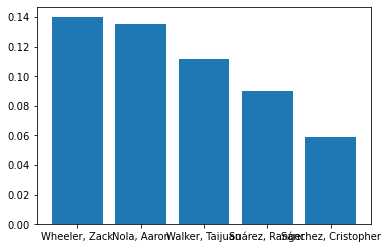

In [156]:
# Make a Nice Bar Chart for Us, Just the Top 5? Top 10?
df = df.head(5)

x = df['%share_pitches']
y = df['player_name']
#plt.bar(x,y,color = 'darkblue', align = 'edge', width = 0.5, edgecolor = 'yellow', lw= 5)
plt.bar(y, x)

In [ ]:
# These are supposed to be quick hitters.
# Are they?

## 4. Month by Month Player Performances
Marsh, JT, Casty, Bryce, Wheeler, Kimbrel, Stott

In [180]:
def get_months(df):
    # Get the Months
    df.game_date = pd.to_datetime(df.game_date)
    df['month'] = df.game_date.dt.month
    df['Month'] = df.game_date.dt.strftime('%b')#month
    return df

### Template Batter Results

In [ ]:
batter = po23[po23.player_name == 'Schwarber, Kyle'] ## input batter name
df = last_pitch_abs(get_months(batter))
year = results('player_name')
months = results('month')
year, months

### Brandon Marsh

In [196]:
marsh = po23[po23.player_name == 'Marsh, Brandon']
df = last_pitch_abs(get_months(marsh))
year = results('player_name') # Season
months = results('month')
pd.concat([year, months])
# There is no way Marsh overperformed THIS much in each of the months, right?

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba,month
0,"Marsh, Brandon",2149,512,288,125,13.0,60.0,159,0.282,0.230,0.369,0.463,0.832,0.360,0.320,NaN
0,NaN,13,4,3,2,0.0,0.0,1,0.500,0.150,0.500,1.250,1.750,0.703,0.137,3.0
1,NaN,407,95,54,26,4.0,13.0,27,0.317,0.239,0.411,0.610,1.020,0.429,0.348,4.0
2,NaN,343,82,44,15,1.0,8.0,29,0.208,0.189,0.293,0.278,0.570,0.261,0.261,5.0
3,NaN,370,86,50,22,2.0,6.0,30,0.286,0.222,0.326,0.429,0.754,0.321,0.294,6.0
4,NaN,302,78,47,18,0.0,11.0,19,0.273,0.255,0.385,0.409,0.794,0.352,0.340,7.0
5,NaN,191,42,29,14,2.0,6.0,5,0.412,0.327,0.524,0.647,1.171,0.499,0.427,8.0
6,NaN,341,78,33,13,2.0,12.0,33,0.200,0.194,0.321,0.354,0.674,0.302,0.295,9.0
7,NaN,182,47,28,15,2.0,4.0,15,0.349,0.250,0.404,0.581,0.986,0.419,0.342,10.0


### JT Realmuto

In [197]:
jt = po23[po23.player_name == 'Realmuto, J.T.']
df = last_pitch_abs(get_months(jt))
year = results('player_name') # Season
months = results('month')
pd.concat([year, months])
# JT was expected to heat up a bit over the summer, but mostly met expectations :/

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba,month
0,"Realmuto, J.T.",2297,589,392,136,23.0,33.0,151,0.251,0.248,0.304,0.457,0.760,0.324,0.327,NaN
0,NaN,20,5,4,3,0.0,0.0,1,0.600,0.502,0.600,1.200,1.800,0.739,0.642,3.0
1,NaN,362,97,68,24,3.0,3.0,25,0.264,0.247,0.289,0.429,0.717,0.304,0.296,4.0
2,NaN,335,90,61,18,0.0,8.0,19,0.228,0.199,0.311,0.367,0.678,0.298,0.280,5.0
3,NaN,370,91,58,18,5.0,6.0,25,0.214,0.243,0.275,0.500,0.775,0.325,0.341,6.0
4,NaN,334,86,52,18,4.0,7.0,24,0.237,0.247,0.314,0.434,0.748,0.323,0.354,7.0
5,NaN,326,78,49,21,3.0,4.0,24,0.288,0.231,0.333,0.479,0.813,0.349,0.298,8.0
6,NaN,349,90,64,21,5.0,4.0,20,0.253,0.299,0.300,0.446,0.746,0.319,0.377,9.0
7,NaN,201,52,36,13,3.0,1.0,13,0.260,0.255,0.288,0.520,0.808,0.341,0.318,10.0


### Nick Castellanos

In [198]:
# Casty BA, xWOBA by Month
casty = po23[po23.player_name == 'Castellanos, Nick']
df = last_pitch_abs(get_months(casty))
year = results('player_name') # Season
months = results('month')
pd.concat([year, months])
# Casty really did have high xWOBA early on and in the playoffs. He was underperforming towards the end of the year.

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba,month
0,"Castellanos, Nick",2614,723,481,180,34.0,38.0,199,0.267,0.255,0.306,0.481,0.787,0.334,0.323,NaN
0,NaN,21,5,2,2,0.0,0.0,3,0.400,0.203,0.400,0.600,1.000,0.425,0.187,3.0
1,NaN,433,116,80,33,4.0,9.0,27,0.308,0.295,0.362,0.505,0.867,0.372,0.365,4.0
2,NaN,401,109,73,27,1.0,6.0,30,0.265,0.230,0.303,0.392,0.695,0.300,0.281,5.0
3,NaN,385,107,74,34,5.0,7.0,25,0.347,0.311,0.383,0.561,0.944,0.399,0.392,6.0
4,NaN,353,103,64,16,4.0,2.0,35,0.162,0.202,0.194,0.303,0.497,0.215,0.239,7.0
5,NaN,422,120,85,34,8.0,3.0,32,0.293,0.255,0.308,0.552,0.860,0.360,0.317,8.0
6,NaN,407,109,66,24,7.0,8.0,33,0.245,0.242,0.303,0.531,0.833,0.347,0.323,9.0
7,NaN,192,54,37,10,5.0,3.0,14,0.200,0.244,0.241,0.540,0.781,0.319,0.363,10.0


### Kyle Schwarber

In [203]:
# Schwarber HRs by month
schwarber = po23[po23.player_name == 'Schwarber, Kyle']
df = last_pitch_abs(get_months(schwarber))
year = results('player_name')
months = results('month')
year

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Schwarber, Kyle",3295,771,403,127,52,128,231,0.201,0.222,0.34,0.487,0.826,0.355,0.368


In [202]:
months
# he hit 5 HRs in October?

,month,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,3,17,5,3,0.0,0.0,0.0,2,0.000,0.057,0.000,0.000,0.000,0.000,0.097
1,4,485,118,66,21.0,6.0,18.0,32,0.214,0.225,0.347,0.439,0.786,0.345,0.352
2,5,458,108,53,10.0,7.0,20.0,34,0.115,0.205,0.287,0.368,0.655,0.293,0.355
3,6,505,122,66,23.0,8.0,16.0,37,0.219,0.245,0.328,0.505,0.833,0.355,0.373
4,7,484,117,64,17.0,6.0,19.0,34,0.177,0.203,0.308,0.406,0.714,0.311,0.322
5,8,529,120,63,20.0,10.0,24.0,32,0.213,0.234,0.375,0.564,0.939,0.395,0.403
6,9,583,124,56,24.0,10.0,24.0,43,0.242,0.198,0.395,0.576,0.971,0.411,0.380
7,10,234,57,32,12.0,5.0,7.0,17,0.245,0.274,0.351,0.633,0.984,0.408,0.431


### Bryce Harper

In [206]:
# What a fucking monster he is
batter = po23[po23.player_name == 'Harper, Bryce'] ## input batter name
df = last_pitch_abs(get_months(batter))
year = results('player_name')
months = results('month')
year

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Harper, Bryce",2250,591,373,146,26,83,130,0.293,0.294,0.396,0.511,0.907,0.39,0.41


In [207]:
months

,month,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,5,393,103,64,28,3.0,13,26,0.315,0.266,0.398,0.483,0.881,0.382,0.367
1,6,456,110,73,24,0.0,14,23,0.253,0.271,0.345,0.295,0.640,0.294,0.357
2,7,362,101,66,27,2.0,11,23,0.303,0.271,0.386,0.438,0.824,0.363,0.340
3,8,382,113,74,35,10.0,12,24,0.361,0.350,0.442,0.784,1.226,0.501,0.484
4,9,428,111,65,20,6.0,22,23,0.230,0.288,0.387,0.483,0.870,0.377,0.429
5,10,229,53,31,12,5.0,11,11,0.286,0.338,0.434,0.643,1.077,0.450,0.533


In [171]:
# Bryce EV by Month
bryce = po23[po23.player_name == 'Harper, Bryce']
df = bryce

# Get the Months
df.game_date = pd.to_datetime(df.game_date)
df['month'] = df.game_date.dt.month
df['Month'] = df.game_date.dt.strftime('%b')#month

# Balls in Play
bip = df[df.bb_type.isin(['line_drive', 'ground_ball', 'fly_ball', 'popup'])]
bip = df[df.description == 'hit_into_play']
df = bip

# Group by month, agg average launch_speed
df.groupby(['Month','month'], as_index = False).agg({'launch_speed' : 'mean'
                                           ,'release_speed' : 'mean'
                                           ,'estimated_ba_using_speedangle' : 'mean'
                                           ,'estimated_woba_using_speedangle' : 'mean'
                                          }
                                         ).round(3).sort_values(by = 'month')

,Month,month,launch_speed,release_speed,estimated_ba_using_speedangle,estimated_woba_using_speedangle
3,May,5,89.784,88.369,0.374,0.449
2,Jun,6,90.789,87.045,0.357,0.404
1,Jul,7,90.933,87.885,0.365,0.393
0,Aug,8,93.558,87.500,0.464,0.598
5,Sep,9,90.505,88.798,0.390,0.483
4,Oct,10,93.481,88.094,0.458,0.659


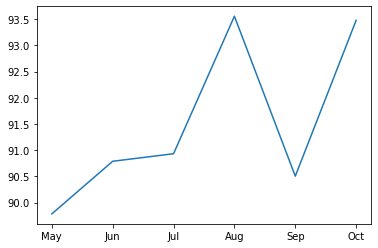

In [172]:
## A Quick Trend Graph?
df = df.groupby(['Month','month'], as_index = False).agg({'launch_speed' : 'mean'
                                           ,'release_speed' : 'mean'
                                           ,'estimated_ba_using_speedangle' : 'mean'
                                           ,'estimated_woba_using_speedangle' : 'mean'
                                          }
                                         ).round(3).sort_values(by = 'month')

x = df.Month.values
y = df.launch_speed.values
plt.plot(x,y)

### Bryson Stott

#### Results

In [209]:
batter = po23[po23.player_name == 'Stott, Bryson'] ## input batter name
df = last_pitch_abs(get_months(batter))
year = results('player_name')
months = results('month')
year

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Stott, Bryson",2881,691,527,175,16,41,114,0.276,0.255,0.323,0.411,0.733,0.317,0.302


In [210]:
months

,month,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,3,18,4,2,1,0.0,0.0,2,0.250,0.045,0.250,0.250,0.500,0.221,0.040
1,4,531,124,97,38,2.0,5.0,22,0.319,0.275,0.347,0.429,0.775,0.337,0.293
2,5,460,110,85,25,3.0,7.0,16,0.253,0.260,0.300,0.374,0.674,0.292,0.313
3,6,412,94,73,26,2.0,5.0,15,0.302,0.228,0.340,0.442,0.782,0.335,0.272
4,7,339,90,71,28,2.0,5.0,13,0.337,0.299,0.378,0.506,0.884,0.378,0.343
5,8,452,109,88,26,5.0,8.0,11,0.268,0.298,0.330,0.495,0.825,0.350,0.362
6,9,432,103,74,17,1.0,6.0,21,0.181,0.196,0.243,0.255,0.498,0.225,0.243
7,10,237,57,37,14,1.0,5.0,14,0.275,0.222,0.333,0.373,0.706,0.310,0.289


In [208]:
# Bryson Stott Exit Velo Month over Month, His EV was going up as the season progressed.
stott = po23[po23.player_name == 'Stott, Bryson']
df = stott[stott.type == 'X']

# Get the Months
df.game_date = pd.to_datetime(df.game_date)
df['month'] = df.game_date.dt.month
df['Month'] = df.game_date.dt.strftime('%b')#month

df.groupby(['Month', 'month'], as_index = False).agg({'batter' : 'count'
                                                     ,'launch_speed' : 'mean'}).rename(columns = {'batter' : 'bip'
                                                                                               ,'launch_speed' : 'meanEV'}).round(1).sort_values(by = 'month')

,Month,month,bip,meanEV
4,Mar,3,2,88.1
0,Apr,4,97,87.1
5,May,5,85,87.3
3,Jun,6,73,87.0
2,Jul,7,71,89.1
1,Aug,8,88,89.9
7,Sep,9,74,85.0
6,Oct,10,37,88.8


### Zack Wheeler

In [173]:
# Zack Wheeler Avg Velocity by Month
## Maybe try ERA or xERA? FIP? Exit Velo
wheeler = pp23[pp23.player_name == 'Wheeler, Zack']
df = wheeler

# Get the Months
df.game_date = pd.to_datetime(df.game_date)
df['month'] = df.game_date.dt.month
df['Month'] = df.game_date.dt.strftime('%b')#month

In [174]:
df.groupby(['Month', 'month', 'pitch_name', 'pitch_type'], as_index = False).agg({'release_speed' : 'mean'}).round(2).sort_values(by = ['pitch_type', 'month'])

,Month,month,pitch_name,pitch_type,release_speed
1,Apr,4,Changeup,CH,89.50
18,Jun,6,Changeup,CH,91.80
12,Jul,7,Changeup,CH,92.30
35,Sep,9,Changeup,CH,89.70
2,Apr,4,Curveball,CU,81.04
24,May,5,Curveball,CU,80.81
19,Jun,6,Curveball,CU,81.11
13,Jul,7,Curveball,CU,82.13
7,Aug,8,Curveball,CU,81.73
36,Sep,9,Curveball,CU,81.44


<BarContainer object of 7 artists>

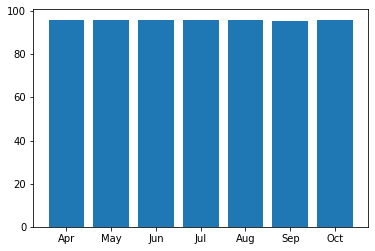

In [175]:
# A Quick Bar Graph
df = df.groupby(['Month', 'month', 'pitch_name', 'pitch_type'], as_index = False).agg({'release_speed' : 'mean'
                                                                                      }
                                                                                     ).round(2).sort_values(by = ['pitch_type', 'month'])

df = df[df.pitch_type == 'FF']
x = df.Month
y = df.release_speed
plt.bar(x,y)
#plt.annotate(y)

In [176]:
df

,Month,month,pitch_name,pitch_type,release_speed
0,Apr,4,4-Seam Fastball,FF,95.81
23,May,5,4-Seam Fastball,FF,95.98
17,Jun,6,4-Seam Fastball,FF,95.92
11,Jul,7,4-Seam Fastball,FF,96.03
6,Aug,8,4-Seam Fastball,FF,95.86
34,Sep,9,4-Seam Fastball,FF,95.32
28,Oct,10,4-Seam Fastball,FF,96.04


### Craig Kimbrel

In [177]:
# Kimbrel Total Pitches by Month
kimbrel = pp23[pp23.player_name == 'Kimbrel, Craig']
df = kimbrel

# Get the Months
df.game_date = pd.to_datetime(df.game_date)
df['month'] = df.game_date.dt.month
df['Month'] = df.game_date.dt.strftime('%b')#month

In [178]:
df.groupby(['Month', 'month'], as_index = False).agg({'batter' : 'count'
                                                     ,'game_pk' : 'nunique'}).rename(columns = {'batter' : 'pitches'
                                                                                               ,'game_pk' : 'games'}).sort_values(by = 'month')

,Month,month,pitches,games
0,Apr,4,169,12
4,May,5,177,10
3,Jun,6,216,13
2,Jul,7,170,13
1,Aug,8,179,11
6,Sep,9,211,12
5,Oct,10,131,7


In [ ]:
# Either look at process or results

## 5. Bryce w and w/o Batting Gloves
Yes, this is a real thought I had. <br>
Watch every at bat in May? In his career? To identify when he is or is not wearing batting gloves <br>
This is true lunatic behavior. <br>
But I think if I were truly committed to understanding the total ins and outs of my opponents, I would do this. <br>
Can I commit myself to be this loco? To what sport? Soccer? Sheesh.

## 6. Kimbrel 400th Save
I had lots of specific games to analyze. Look at Gamefeed. See if velo or spin rate was up in those games? idk

In [204]:
kimbrel_400th = '2023-05-26' # Kellen just pulled that btw. NOT a big deal.
df = pp23[(pp23.player_name == 'Kimbrel, Craig')
          &(pp23.game_date == kimbrel_400th)
         ]
len(df)
df.groupby(['pitch_type', 'pitch_name'], as_index = False).agg({'batter' : 'count'
                                                                ,'release_speed' : 'mean'
                                                                ,'release_spin_rate' : 'mean'
                                                               }).round(1).sort_values(by = 'pitch_type').rename(columns = {'batter' : 'pitches'
                                                                                                                            ,'release_speed' : 'avg. velo'
                                                                                                                            ,'release_spin_rate' : 'avg. spin'
                                                                                                                            }
                                                                                                                 )

,pitch_type,pitch_name,pitches,avg. velo,avg. spin
0,FF,4-Seam Fastball,18,95.6,2346.6
1,KC,Knuckle Curve,4,85.9,2503.5


In [205]:
# Well what were his averages for the season? That is actually pretty fricking easy to find
df = pp23[(pp23.player_name == 'Kimbrel, Craig')]
df.groupby(['pitch_type', 'pitch_name'], as_index = False).agg({'batter' : 'count'
                                                                ,'release_speed' : 'mean'
                                                                ,'release_spin_rate' : 'mean'
                                                               }).round(1).sort_values(by = 'pitch_type').rename(columns = {'batter' : 'pitches'
                                                                                                                            ,'release_speed' : 'avg. velo'
                                                                                                                            ,'release_spin_rate' : 'avg. spin'
                                                                                                                            }
                                                                                                                 )

,pitch_type,pitch_name,pitches,avg. velo,avg. spin
0,FF,4-Seam Fastball,836,95.8,2363.3
1,KC,Knuckle Curve,417,86.2,2611.0


### Kimbrel was actually spinning the ball a little less and throwing with a little less umph on the night of his 400th.
Maybe because he had been getting a lot of work in recently? No.

In [ ]:
# Kimbrel usage around his 400th
may = df[(df.game_date >= '2023-05-01')
         &(df.game_date <= '2023-05-30')
        ]
may.groupby('game_date', as_index = False).agg({'batter' : 'count'}).rename(columns = {'batter' : 'pitches'}).sort_values(by = 'game_date')
# Not exactly getting worked like a dog that month?

## 7. Expected BA on JT Play @ CHC 6/29
Did not guess the date correctly on this one. (Off by one day)<br>
But searched for plays made by the Phillies catcher from June 22nd to July 1st, there were 3. <br>

In [220]:
df = pp23[(pp23.game_date == '2023-06-29')
          &(pp23.inning == 9)
          &(pp23.type == 'X')
          &(pp23.hit_location == 2)
         ]
round(df.estimated_ba_using_speedangle.iloc[0], 3), round(df.delta_home_win_exp.iloc[0], 3)
# The Estimated BA was just .257 # really? Well according to Baseball Savant it is .271
# The Change in Home WPA was -0.029

(0.257, -0.029)

### Pretty low

## 8. Top 5 Plays by WPA^2
I need to think about if this is actually a viable measure <br>
I could just take the absolute fucking value

In [223]:
df.delta_home_win_exp
wpa = -0.029
wpa, wpa**2, abs(wpa) 

(-0.029, 0.0008410000000000001, 0.029)

In [224]:
df = po23
df['wpa'] = abs(df.delta_home_win_exp)
df.sort_values(by='wpa', ascending = False).head(5).loc[:, ['player_name'
                                                            ,'game_date'
                                                            ,'inning'
                                                            ,'outs_when_up'
                                                            ,'events'
                                                            ,'delta_home_win_exp'
                                                            ,'wpa'
                                                           ]
                                                       ]

,player_name,game_date,inning,outs_when_up,events,delta_home_win_exp,wpa
11342,"Pache, Cristian",2023-07-07,9,2,home_run,-0.702,0.702
4525,"Harper, Bryce",2023-08-30,8,2,home_run,0.623,0.623
4434,"Turner, Trea",2023-09-01,8,2,home_run,-0.616,0.616
9372,"Stott, Bryson",2023-07-25,9,2,double,0.512,0.512
18889,"Realmuto, J.T.",2023-05-10,9,1,double,0.512,0.512


### 1. Pache HR @ MIA <br>
https://baseballsavant.mlb.com/sporty-videos?playId=bf30afa5-88de-4731-8c44-14241e8fb264&videoType=AWAY <br>
### 2. Harper HR vs LAA <br>
https://baseballsavant.mlb.com/sporty-videos?playId=692bc9b5-ec70-4e38-8f0b-54140117d3d5 <br>
### 3. Turner HR @ MIL <br>
https://baseballsavant.mlb.com/sporty-videos?playId=2ebd2463-2502-453e-bf82-24d899019e58&videoType=AWAY <br>
### 4. JT double vs TOR <br>
https://baseballsavant.mlb.com/sporty-videos?playId=66279d6c-f256-43cf-b1b7-b2f7dc0361dd <br>
### 5. Stott double vs BAL <br>
https://baseballsavant.mlb.com/sporty-videos?playId=33b33794-1079-4c6b-9261-f5891bd593e3

## 9. Rojas xBA Diving Catch @ PIT mid July
I have no idea the date of this game. <br>
Will look by pitcher at defensive plays made by Rojas in July <br>
Could be a lot. <br>
**Defensive Plays by Phillies CF at PNC Park in July**

In [340]:
# I remember it being McCutchen which got me to pick the right video then I worked from there
pp23[(pp23.hit_location == 8)
     &(pp23.player_name == 'Strahm, Matt')
     &(pp23.game_date == '2023-07-29')
     &(pp23.inning == 6)
    ].loc[:, ['estimated_ba_using_speedangle'
              ,'estimated_woba_using_speedangle'
              ,'launch_speed'
              ,'launch_angle'
              ,'hit_distance_sc'
              ,'launch_speed_angle'
             ]
         ]

,estimated_ba_using_speedangle,estimated_woba_using_speedangle,launch_speed,launch_angle,hit_distance_sc,launch_speed_angle
8532,0.563,0.542,83.1,22.0,276.0,4.0


### xBA = .526, EV = 83 MPH, LA = 22, Dist = 277 ft
https://baseballsavant.mlb.com/sporty-videos?playId=59f9c610-c745-4c5b-a990-2120d8d62cc5&videoType=AWAY

## 10. Lorenzen No Hitter
Get date by looking at Batters (grouped by Team & Game) with Team = Nationals and Pitcher = Lorenzen <br>
Analyze. <br>
How many play did Rojas actually make in the no hitter? <br>

In [226]:
# I do not need to filter outs because all balls in play were outs
lorenzen_no_hitter = pp23[pp23.game_date == '2023-08-09']
df = lorenzen_no_hitter

In [227]:
# Final pitch of each at bat
max_pitch_number_per_ab = df.groupby('at_bat_number', as_index = False).agg({'pitch_number' : 'max'}).rename(columns = {'pitch_number' : 'fp'})
fp = max_pitch_number_per_ab
final_pitches = df.merge(fp, left_on = ['at_bat_number', 'pitch_number'], right_on = ['at_bat_number', 'fp'])
df = final_pitches

## Plays and Mean xBA by position
## Catcher is the punchies (len(df[df.events == 'strikeout']) = 5)
df.groupby('hit_location', as_index = False).agg({'batter' : 'count'
                                                 ,'estimated_ba_using_speedangle' : 'mean'}).round(3).rename(columns = {'batter' : 'plays'
                                                                                                                         ,'estimated_ba_using_speedangle' : 'mean_xBA'
                                                                                                                        }
                                                                                                             ).sort_values(by = 'plays', ascending = False) # Yes, Rojas made a ton of plays

,hit_location,plays,mean_xBA
6,8.0,9,0.214
0,2.0,5,NaN
7,9.0,4,0.137
3,5.0,3,0.120
1,3.0,2,0.290
5,7.0,2,0.004
2,4.0,1,0.500
4,6.0,1,0.437


In [229]:
# What is the hit location on the walk? NaN
df = lorenzen_no_hitter
df.groupby('events', as_index = False).agg({'batter' : 'count'}) # 4 walks
walks = df[df.events == 'walk']
walks.hit_location

6923   NaN
6946   NaN
6980   NaN
6991   NaN
Name: hit_location, dtype: float64

In [230]:
walks.loc[:, ['inning']]

,inning
6923,6
6946,4
6980,2
6991,1


## 11. Bullpen Use Around Lorenzen start @ MIA 8/3
Identify the previous week of games, find the starters for those games and look at share of innings pitched <br>
Will compare share of total pitches to see true workload too. <br>
Gonna be a bit of a drag.

In [1]:
df = pp23[(pp23.game_date >= '2023-07-27')
          &(pp23.game_date < '2023-08-03')
         ]

starters = ['Wheeler, Zack', 'Nola, Aaron', 'Walker, Taijuan', 'Suarez, Ranger', 'Sanchez, Cristopher']
# nah let's look at who threw the first pitch of the game for each of the games

NameError: name 'pp23' is not defined

In [233]:
first_pitch_by_pitcher_and_game = df.groupby(['player_name', 'game_date', 'game_pk'],as_index=False).agg({'at_bat_number' : 'min'
                                                                                                          ,'pitch_number' : 'min'
                                                                                                          })

x = first_pitch_by_pitcher_and_game
x.groupby('game_date',as_index=False).agg({'game_pk' : 'nunique'}) # Just one game per date
min_ab_by_game = x.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'})
x.merge(min_ab_by_game, left_on = ['game_pk', 'at_bat_number'], right_on = ['game_pk', 'at_bat_number'], suffixes = ('','_yaMOM'))
# I did all this just to prove that the starters in those games were the five starters I listed above

In [242]:
# cool.

In [246]:
starter_pitches = len(df[df.player_name.isin(starters)])
starter_pitches

386

In [248]:
all_pitches = len(df)

In [253]:
bullpen_usage = (all_pitches - starter_pitches) / all_pitches
print(str(round(bullpen_usage*100,2))+'% of pitches were thrown by the bullpen in this stretch')

54.91% of pitches were thrown by the bullpen in this stretch


In [269]:
# Share of Pitches by Pitcher
df = mcgs('player_name', last_pitch_abs(pp23))
df.rename({'description' : 'pitches'},inplace= True)
total = df.pitches.sum()

df['%share_pitches'] = df.pitches/total 

share_pitches_by_pitcher = df.loc[:,['player_name'
                                     ,'pitches'
                                     ,'%share_pitches'
                                    ]
                                 ].round(4).sort_values(by = '%share_pitches', ascending = False).reset_index(drop = True)

In [259]:
first_pitch_by_pitcher_and_game = pp23.groupby(['player_name', 'game_date', 'game_pk'],as_index=False).agg({'at_bat_number' : 'min'
                                                                                                          ,'pitch_number' : 'min'
                                                                                                          })

x = first_pitch_by_pitcher_and_game
x.groupby('game_date',as_index=False).agg({'game_pk' : 'nunique'}) # Just one game per date
min_ab_by_game = x.groupby('game_pk',as_index=False).agg({'at_bat_number' : 'min'})
starters = x.merge(min_ab_by_game, left_on = ['game_pk', 'at_bat_number'], right_on = ['game_pk', 'at_bat_number'], suffixes = ('','_yaMOM'))
# I did all this just to prove that the starters in those games were the five starters I listed above

In [262]:
starters = starters.player_name.unique().tolist()
starters.remove('Brogdon, Connor')

In [286]:
starter_share = round(df[df.player_name.isin(starters)].agg({'%share_pitches' : 'sum'})[0]*100,2)
bullpen_share = 100-starter_share

In [293]:
df[df.player_name.isin(['Strahm, Matt', 'Covey, Dylan'])].loc[:,['player_name','%share_pitches']]

,player_name,%share_pitches
4,"Covey, Dylan",0.026413
19,"Strahm, Matt",0.057346


In [294]:
print('On the season as whole, the bullpen (exlcuding Strahm (5.7%) and Covey (2.6%)) accounted for {}% of pitches thrown'.format(bullpen_share))

On the season as whole, the bullpen (exlcuding Strahm (5.7%) and Covey (2.6%)) accounted for 32.0% of pitches thrown


### He Saved the Bullpen.

## 12. Harper 3 run HR vs Giants WPA

In [296]:
df = po23[(po23.game_date == '2023-08-23')
          &(po23.inning == 9)
          &(po23.player_name == 'Harper, Bryce')
          &(po23.type == 'X')
         ].loc[:, ['events'
                   ,'delta_home_win_exp'
                   ,'launch_speed'
                   ,'launch_angle'
                   ,'hit_distance_sc'
                   ,'estimated_ba_using_speedangle'
                   ,'estimated_woba_using_speedangle'
                  ]
              ]

In [297]:
df
# it was +0.461
# is that good?

,events,delta_home_win_exp,launch_speed,launch_angle,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle
5432,home_run,0.461,112.9,21.0,357.0,0.969,1.779


## 13. Sept 11th DH with Atlanta
I don't remember anything about this? Not entirely true. <br>
Pretty sure Trea had some big homers? <br>
Harper tied it in the 8th off of Iglesias. Check WPA

In [ ]:
b = po23[po23.game_date == '2023-09-11']
p = pp23[pp23.game_date == '2023-09-11']

In [ ]:
b[(b.events == 'home_run') & (b.player_name == 'Harper, Bryce')].loc[:, ['launch_speed'
                                                                         ,'launch_angle'
                                                                         ,'launch_speed_angle' ## 6 = Barrel
                                                                         ,'hit_distance_sc'
                                                                         ,'delta_home_win_exp'
                                                                         ,'estimated_ba_using_speedangle'
                                                                         ,'estimated_woba_using_speedangle'
                                                                        ]
                                                                    ]
# WPA of 0.489, barreled that shit

## 14. Jake Cave first base mitt?
This is actually kinda funny, lol. <br>
I need to find opportunities at First Base for Jake Cave. <br>
I have to do this in my data and then do the Statcast Search.

In [ ]:
cave = po23[po23.player_name == 'Cave, Jake']
cave_id = cave.batter.unique()[0]
cave_at_1b = pp23[pp23.fielder_3 == cave_id]
opps = cave_at_1b[cave_at_1b.hit_location == 3]

In [ ]:
opps.loc[:, ['player_name'
             ,'game_date'
             ,'inning'
             ,'outs_when_up'
             ,'events'
             ,'des'
             ,'estimated_ba_using_speedangle'
             ,'launch_speed'
             ,'launch_angle'
             ,'hit_distance_sc'
            ]
        ].sort_values(by = ['estimated_ba_using_speedangle'], ascending = False)
# Ok I figured out how to use statcast search for it too

### But yes, he wears the Wilson Pudge glove as his First Base Mitt

## 15. Jean Segura 200th Career Double
Talk about a win for the Kellen-Has-Autism Theory as I just fucking sniped the correct date/video for Jean Segura's 200th career double.<br> Seeing the standing O is just incredible lol
<br> I need to do the best of Jean hahaha
<br> EV = 95.1, Dist = 233 ft, Launch Angle = 13, xBA = .929

In [302]:
jean[(jean.events == 'double')
     &(jean.launch_speed == 95.1)
     &(jean.hit_distance_sc == 233)
     &(jean.launch_angle == 13)
     &(jean.estimated_ba_using_speedangle == 0.929)
    ].loc[:, ['launch_speed', 'hit_distance_sc', 'launch_angle', 'estimated_ba_using_speedangle', 'launch_speed_angle']]

,launch_speed,hit_distance_sc,launch_angle,estimated_ba_using_speedangle,launch_speed_angle
149472,95.1,233.0,13.0,0.929,4.0


## 16. Rojas vs. Pitchers Like Bednar
I would need Bednar's archetype (high velo, wipeout slider) then look at how Rojas does against those guys

In [303]:
rojas_id = pp23[pp23.game_date == '2023-09-26'].fielder_8.unique()[0]
rojas = po23[po23.batter == rojas_id]

In [304]:
df = rojas
df[(df.game_date == '2023-09-26')
   &(df.inning == 10)
  ]
bednar_id = 670280
bednar = po23[po23.pitcher == bednar_id]

In [305]:
bednar.groupby(['pitch_name','pitch_type'], as_index = False).agg({'batter' : 'count'
                                                                   ,'release_speed' : 'mean'
                                                                   ,'release_spin_rate' : 'mean'
                                                                  }).rename(columns = {'batter' : 'pitches'})

,pitch_name,pitch_type,pitches,release_speed,release_spin_rate
0,4-Seam Fastball,FF,41,96.863415,2431.317073
1,Curveball,CU,25,78.984000,2479.720000
2,Split-Finger,FS,13,91.823077,1586.076923


In [306]:
opp_pitchers = po23.groupby(['pitcher', 'pitch_name', 'pitch_type'], as_index=False).agg({'batter' : 'count'
                                                                                          ,'release_speed' : 'mean'
                                                                                          ,'release_spin_rate' : 'mean'
                                                                           }).round(1)
opp_pitchers.rename(columns = {'batter' : 'pitches'
                              ,'release_speed' : 'veloMU'
                              ,'release_spin_rate' : 'spinMU'}
                   ,inplace = True)

In [307]:
rojas = rojas.merge(opp_pitchers, left_on = ['pitcher','pitch_type'], right_on = ['pitcher','pitch_type'], suffixes = ('','_op'))

In [308]:
# Rojas AB vs Bednar on 9/26
rojas[(rojas.pitcher == bednar_id)
     &(rojas.game_date == '2023-09-26')
     ].loc[:, ['pitch_number'
               ,'balls'
               ,'strikes'
               ,'pitch_type'
               ,'pitch_name'
               ,'release_speed'
               ,'veloMU'
               ,'release_spin_rate'
               ,'spinMU'
               ,'zone'
               ,'events'
               ,'type'
               ,'description'
              ]
          ].sort_values(by = 'pitch_number')

,pitch_number,balls,strikes,pitch_type,pitch_name,release_speed,veloMU,release_spin_rate,spinMU,zone,events,type,description
69,1,0,0,FF,4-Seam Fastball,97.4,96.9,2533.0,2431.3,6,NaN,S,called_strike
75,2,0,1,CU,Curveball,78.3,79.0,2709.0,2479.7,14,NaN,S,swinging_strike
74,3,0,2,CU,Curveball,78.8,79.0,2734.0,2479.7,14,NaN,B,blocked_ball
68,4,1,2,FF,4-Seam Fastball,97.3,96.9,2477.0,2431.3,1,single,X,hit_into_play


In [309]:
opp_sds = po23.groupby(['pitcher', 'pitch_name', 'pitch_type'], as_index=False).agg({'batter' : 'count'
                                                                                     ,'release_speed' : 'std'
                                                                                     ,'release_spin_rate' : 'std'
                                                                           }).round(1)
opp_sds.fillna(0,inplace=True)
opp_sds.rename(columns = {'batter' : 'pitches'
                          ,'release_speed' : 'veloSD'
                          ,'release_spin_rate' : 'spinSD'
                         }
               ,inplace=True)
opp_pitchers = opp_pitchers.merge(opp_sds, left_on = ['pitcher', 'pitch_type'], right_on = ['pitcher', 'pitch_type'], suffixes = ('', '_sd'))

In [310]:
# Pitchers who have Mean Fastball Velo within 1 (Bednar) SD of Bednar's Mean
df = opp_pitchers[opp_pitchers.pitcher == bednar_id]
df['low_velo'] = df.veloMU - df.veloSD
df['high_velo'] = df.veloMU + df.veloSD
df['low_spin'] = df.spinMU - df.spinSD
df['high_spin'] = df.spinMU + df.spinSD

In [311]:
# Filter to 4 Seam Fastballs
ff = opp_pitchers[opp_pitchers.pitch_type == 'FF'] # 4 seam
# Filter to 4 Seam Fastballs within 1 (Bednar SD) of Bednar's Mean
ff = ff[(ff.veloMU >= df[df.pitch_type == 'FF'].low_velo.values[0])
        &(ff.veloMU <= df[df.pitch_type == 'FF'].high_velo.values[0])
        &(ff.spinMU >= df[df.pitch_type == 'FF'].low_spin.values[0])
        &(ff.spinMU <= df[df.pitch_type == 'FF'].high_spin.values[0])
       ]

In [312]:
rojas[rojas.pitcher.isin(ff.pitcher)].groupby('pitcher', as_index = False).agg({'game_pk' : 'nunique'
                                                                                ,'pitch_number' : 'count'
                                                                               }).sort_values(by = 'pitch_number', ascending = False)

,pitcher,game_pk,pitch_number
4,675911,4,38
1,621345,3,12
3,670280,3,11
0,608638,1,4
2,643377,1,3
5,678226,1,2


In [313]:
# Curious who these mofos are?
players = pd.read_csv('SFBB Player ID Map - PLAYERIDMAP.csv')
players[players.MLBID.isin(ff.pitcher)].loc[: , ['PLAYERNAME', 'MLBID']].sort_values(by = 'MLBID')
# 675911 Spencer Strider
# 621345 A.J. Minter
# 670280 David Bednar
# 608638 J.T. Chargois
# 643377 Griffin Jax
# 678226 Daysbel Hernandez

,PLAYERNAME,MLBID
1576,Gerrit Cole,543037.0
1593,Robert Stephenson,596112.0
1638,Rafael Montero,606160.0
2212,J.T. Chargois,608638.0
1791,Kendall Graveman,608665.0
2249,A.J. Minter,621345.0
1944,Keynan Middleton,641871.0
1930,Jonathan Loaisiga,642528.0
2547,Griffin Jax,643377.0
2599,David Bednar,670280.0


In [ ]:
# Only Strider and Bednar are RHPs who have thrown their FF to Rojas
# he does ok against it? He has only hit the ball in play twice on it, both hits off of Bednar

In [ ]:
# Does Rojas have Trouble with a Bednaresque curve?

In [314]:
cu = opp_pitchers[opp_pitchers.pitch_type == 'CU'] # curve
# Filter to Curveballs within 1 (Bednar SD) of Bednar's Mean
cu = cu[(cu.veloMU >= df[df.pitch_type == 'CU'].low_velo.values[0])
        &(cu.veloMU <= df[df.pitch_type == 'CU'].high_velo.values[0])
        &(cu.spinMU >= df[df.pitch_type == 'CU'].low_spin.values[0])
        &(cu.spinMU <= df[df.pitch_type == 'CU'].high_spin.values[0])
       ]

In [315]:
rojas_cu = rojas[rojas.pitcher.isin(cu.pitcher)]
players[players.MLBID.isin(rojas_cu.pitcher.unique().tolist())].loc[:, ['PLAYERNAME', 'MLBID']]

,PLAYERNAME,MLBID
2245,Adrian Morejon,670970.0
2398,Jose Butto,676130.0
2599,David Bednar,670280.0


In [316]:
rojas_cu[rojas_cu.pitch_type == 'CU'].groupby('pitcher', as_index=False).agg({'at_bat_number' : 'count'
                                                                              ,'game_pk' : 'nunique'
                                                                             })
# Morejon is the only other one to throw Rojas a curve and he is a southpaw.
# He seems to have trouble with Bednar's curves, they are all in the dirt but he has swung and missed twice.

,pitcher,at_bat_number,game_pk
0,670280,5,3
1,670970,1,1


In [317]:
# Now Bednar's Splitter
fs = opp_pitchers[opp_pitchers.pitch_type == 'FS'] # split
# Filter to Splitters within 1 (Bednar SD) of Bednar's Mean
fs = fs[(fs.veloMU >= df[df.pitch_type == 'FS'].low_velo.values[0])
        &(fs.veloMU <= df[df.pitch_type == 'FS'].high_velo.values[0])
        &(fs.spinMU >= df[df.pitch_type == 'FS'].low_spin.values[0])
        &(fs.spinMU <= df[df.pitch_type == 'FS'].high_spin.values[0])
       ]

In [318]:
rojas_fs = rojas[(rojas.pitcher.isin(fs.pitcher)) & (rojas.pitch_type == 'FS')]

In [319]:
fs # Just Bednar
# His splitter is one of a kind

,pitcher,pitch_name,pitch_type,pitches,veloMU,spinMU,pitch_name_sd,pitches_sd,veloSD,spinSD
1198,670280,Split-Finger,FS,13,91.8,1586.1,Split-Finger,13,0.7,156.4


In [320]:
rojas[rojas.pitch_type == 'FF']

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,runSB,runCS,R/PA,R/W,cFIP,wpa,pitch_name_op,pitches,veloMU,spinMU
0,FF,2023-10-01,93.6,-2.14,5.47,"Rojas, Johan",679032,676130,field_out,hit_into_play,...,0.2,-0.422,0.122,10.028,3.255,0.03,4-Seam Fastball,95,93.8,2426.1
1,FF,2023-10-01,93.5,-2.47,5.41,"Rojas, Johan",679032,676130,NaN,called_strike,...,0.2,-0.422,0.122,10.028,3.255,0.00,4-Seam Fastball,95,93.8,2426.1
2,FF,2023-10-01,95.0,-2.31,5.57,"Rojas, Johan",679032,676130,field_out,hit_into_play,...,0.2,-0.422,0.122,10.028,3.255,0.01,4-Seam Fastball,95,93.8,2426.1
20,FF,2023-09-30,89.4,2.02,5.78,"Rojas, Johan",679032,500779,NaN,ball,...,0.2,-0.422,0.122,10.028,3.255,0.00,4-Seam Fastball,36,90.1,2096.2
21,FF,2023-09-30,90.2,2.16,5.73,"Rojas, Johan",679032,500779,NaN,ball,...,0.2,-0.422,0.122,10.028,3.255,0.00,4-Seam Fastball,36,90.1,2096.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,FF,2023-10-03,97.4,2.14,6.10,"Rojas, Johan",679032,666200,NaN,foul,...,0.2,-0.422,0.122,10.028,3.255,0.00,4-Seam Fastball,139,96.8,2280.7
715,FF,2023-10-03,96.1,2.05,6.16,"Rojas, Johan",679032,666200,NaN,foul,...,0.2,-0.422,0.122,10.028,3.255,0.00,4-Seam Fastball,139,96.8,2280.7
716,FF,2023-10-03,96.4,2.10,6.19,"Rojas, Johan",679032,666200,NaN,ball,...,0.2,-0.422,0.122,10.028,3.255,0.00,4-Seam Fastball,139,96.8,2280.7
717,FF,2023-10-03,96.2,2.27,6.12,"Rojas, Johan",679032,666200,NaN,ball,...,0.2,-0.422,0.122,10.028,3.255,0.00,4-Seam Fastball,139,96.8,2280.7


In [321]:
# Rather than Look at Pitchers, look at specific pitches
rojas_fb = rojas[(rojas.pitch_type == 'FF')
                 &(rojas.release_speed >= df[df.pitch_type == 'FF'].low_velo.values[0])
                 &(rojas.release_speed <= df[df.pitch_type == 'FF'].high_velo.values[0])
                 &(rojas.release_spin_rate >= df[df.pitch_type == 'FF'].low_spin.values[0])
                 &(rojas.release_spin_rate <= df[df.pitch_type == 'FF'].high_spin.values[0])
                ]
rojas_fb # Rojas has seen 27 other fastballs like those within 1 SD of Bednar's Mean FF he has thrown against the Phillies.

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,runSB,runCS,R/PA,R/W,cFIP,wpa,pitch_name_op,pitches,veloMU,spinMU
68,FF,2023-09-26,97.3,-1.87,6.17,"Rojas, Johan",679032,670280,single,hit_into_play,...,0.2,-0.422,0.122,10.028,3.255,0.301,4-Seam Fastball,41,96.9,2431.3
70,FF,2023-07-30,97.1,-1.87,5.91,"Rojas, Johan",679032,670280,NaN,foul,...,0.2,-0.422,0.122,10.028,3.255,0.000,4-Seam Fastball,41,96.9,2431.3
71,FF,2023-07-30,96.0,-2.02,5.98,"Rojas, Johan",679032,670280,NaN,swinging_strike,...,0.2,-0.422,0.122,10.028,3.255,0.000,4-Seam Fastball,41,96.9,2431.3
127,FF,2023-09-19,97.3,-1.90,5.90,"Rojas, Johan",679032,675911,NaN,foul,...,0.2,-0.422,0.122,10.028,3.255,0.000,4-Seam Fastball,374,97.7,2400.0
133,FF,2023-09-13,96.2,-1.95,5.79,"Rojas, Johan",679032,675911,NaN,ball,...,0.2,-0.422,0.122,10.028,3.255,0.000,4-Seam Fastball,374,97.7,2400.0
134,FF,2023-09-13,97.3,-1.84,5.85,"Rojas, Johan",679032,675911,NaN,ball,...,0.2,-0.422,0.122,10.028,3.255,0.000,4-Seam Fastball,374,97.7,2400.0
135,FF,2023-09-13,97.4,-2.11,5.82,"Rojas, Johan",679032,675911,NaN,foul,...,0.2,-0.422,0.122,10.028,3.255,0.000,4-Seam Fastball,374,97.7,2400.0
138,FF,2023-09-13,97.5,-2.18,5.79,"Rojas, Johan",679032,675911,NaN,foul,...,0.2,-0.422,0.122,10.028,3.255,0.000,4-Seam Fastball,374,97.7,2400.0
144,FF,2023-10-12,97.3,-1.86,5.83,"Rojas, Johan",679032,675911,NaN,foul,...,0.2,-0.422,0.122,10.028,3.255,0.000,4-Seam Fastball,374,97.7,2400.0
146,FF,2023-10-07,97.8,-1.89,5.87,"Rojas, Johan",679032,675911,NaN,foul,...,0.2,-0.422,0.122,10.028,3.255,0.000,4-Seam Fastball,374,97.7,2400.0


In [324]:
measure_calcs(get_stats('player_name', last_pitch_abs(rojas_fb))).loc[:, ['description'
                                                          ,'plate_apps'
                                                          ,'at_bats'
                                                          ,'hits'
                                                          ,'ba'
                                                          ,'obp'
                                                          ,'slg'
                                                          ,'ops'
                                                          ,'woba'
                                                         ]
                                                     ]

,description,plate_apps,at_bats,hits,ba,obp,slg,ops,woba
0,27,8,8,1,0.125,0.125,0.125,0.25,0.110375


## 17. How do I contextualize Orion Kerkering?
Could explore a similar approach to the one done on mlb.com? <br>
That is, look at the velo and spin of Orion's pitches and see how many other pitches in baseball are in that range. <br> 
It is gonna be none!

## 18. Does JT murder the Marlins?
Need full JT history in order to do this <br>
Maybe just full JT on the Phillies history.

In [328]:
jt = pos[pos.player_name == 'Realmuto, J.T.']

In [331]:
team = 'MIA'
marlins = jt[((jt.home_team == team)
             &(jt.inning_topbot == 'Top')
            )
            |
            ((jt.away_team == team)
             &(jt.inning_topbot == 'Bot')
            )]

In [335]:
df = last_pitch_abs(marlins)
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Realmuto, J.T.",940,246,164,56,11,12,67,0.241,0.254,0.285,0.431,0.716,0.307,0.314


In [338]:
df = last_pitch_abs(jt[~jt.game_pk.isin(marlins.game_pk)])
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Realmuto, J.T.",9003,2297,1556,552,90,165,527,0.267,0.254,0.331,0.469,0.8,0.342,0.333


### Not particularly.

In [339]:
# Against MIA: OPS = .716, WOBA = .307, xWOBA = .314
# Against else: OPS = 0.800, WOBA = .342, xWOBA = .333

## 19. Stott Grand Slam in NLWC Game 2
Filter to home runs with post score vs pre score = 4 <br>
I know it is at home so I can ignore away games <br>
Then I can add an extra filter to just the Stott Shot.

In [ ]:
po23[(po23.events == 'home_run')
     &(po23.post_home_score - po23.home_score == 4)
     &(po23.player_name == 'Stott, Bryson')
    ].loc[:, ['pitch_type'
              ,'release_speed'
              ,'release_spin_rate'
              ,'launch_speed'
              ,'launch_angle'
              ,'launch_speed_angle'
              ,'hit_distance_sc'
              ,'estimated_ba_using_speedangle'
              ,'estimated_woba_using_speedangle'
              ,'delta_home_win_exp'
             ]
         ]
# EV = 102, LA = 28, dist = 412 ft, barrel, xBA = .780, xWOBA = 1.488, WPA = 0.048

## 20. Trea Turner Defensive Play in NLDS Game 1
Need to figure out the date of that game? <br>
Then I know it is in the bottom of the 8th, will look at bip

In [ ]:
pp23[(pp23.game_date == pp23[pp23.game_type == 'D'].game_date.min())
     &(pp23.inning == 8)
     &(pp23.type == 'X')
     &(pp23.hit_location == 6)
    ].loc[:, ['pitch_type'
              ,'pitch_name'
              ,'release_speed'
              ,'release_spin_rate'
              ,'events'
              ,'hit_location'
              ,'launch_speed'
              ,'launch_angle'
              ,'launch_speed_angle'
              ,'hit_distance_sc'
              ,'estimated_ba_using_speedangle'
              ,'delta_home_win_exp'
             ]
         ]
# EV = 103.4 MPH, LA = 5, dist = 104 ft, xBA = .586, abs(WPA) = 0.118

## 21. Why was Strider committed to gassing Casty in 6th inning of NLCS G4?
His Slider got hit out by Turner earlier, he matched up well with Casty and Fastballs? <br>
I remember thinking in that moment that Strider was only going to throw heaters, why did I think that? <br>
That is a whole lot of context that I need to teach a machine.

In [3]:
phils_sc, pos, pps = get_phillies_data()

Length of phils_sc dataframe: 407099


In [26]:
nlds_game4 = phils_sc[phils_sc.game_date == '2023-10-12']

nlds_game4[(nlds_game4.player_name == 'Castellanos, Nick')
           &(nlds_game4.type == 'X')
          ][['events'
             ,'inning'
             ,'pitcher'
             ,'pitch_type'
             ,'release_speed'
             ,'release_spin_rate'
             ,'zone'
             ,'p_throws'
             ,'launch_speed'
             ,'launch_angle'
             ,'launch_speed_angle'
             ,'estimated_ba_using_speedangle'
            ]
           ]

,events,inning,pitcher,pitch_type,release_speed,release_spin_rate,zone,p_throws,launch_speed,launch_angle,launch_speed_angle,estimated_ba_using_speedangle
380766,home_run,6,675911,FF,100.0,2564.0,5.0,R,112.4,31.0,6.0,0.974
380801,home_run,4,675911,SL,86.8,2446.0,4.0,R,108.3,28.0,6.0,0.960
380853,single,8,572955,CU,86.6,2968.0,5.0,R,97.3,6.0,4.0,0.640


In [27]:
df = casty_hrs = pos[(pos.player_name == 'Castellanos, Nick')
                     &(pos.events == 'home_run')
                    ]

In [28]:
df[(df.game_year == 2023)
   &(df.p_throws == 'R')
  ].groupby(['game_year', 'pitch_type', 'p_throws'],as_index=False
           ).agg({'events' : 'count'
                  ,'release_speed' : 'median'
                  ,'launch_speed' : 'mean'
                  ,'launch_angle' : 'mean'
                  ,'launch_speed_angle' : 'mean'
                  ,'zone' : 'mean'
                 }).round(2).sort_values(by='events', ascending=False)

,game_year,pitch_type,p_throws,events,release_speed,launch_speed,launch_angle,launch_speed_angle,zone
3,2023,SL,R,10,85.5,103.16,29.50,5.80,7.50
1,2023,FF,R,9,93.4,107.39,29.00,6.00,5.78
2,2023,SI,R,3,92.3,103.17,32.00,5.00,5.67
4,2023,ST,R,3,80.9,101.43,30.33,5.67,5.67
0,2023,CU,R,1,78.0,101.90,42.00,5.00,13.00


## 22. Why did the Phillies succeed in NLCS G2 but not NLCS G6 against Merrill Kelly?
I am really trying to put off NLCS analysis.

In [30]:
nlcs_game2 = pos[pos.game_date == '2023-10-17']
nlcs_game6 = pos[pos.game_date == '2023-10-23']

In [32]:
mk_id = merrill_kelly_id = nlcs_game2[nlcs_game2.inning == 1].pitcher.tolist()[0]

In [34]:
df = merrill_kelly = pd.concat([nlcs_game2[nlcs_game2.pitcher == mk_id], nlcs_game6[nlcs_game6.pitcher == mk_id]])

In [39]:
df.groupby(['game_date', 'pitch_type','stand'],as_index=False).agg({'des' : 'count'
                                                                    ,'release_speed' : 'mean'
                                                                    ,'release_spin_rate' : 'mean'
                                                                    ,'zone' : 'mean'
                                                                   }).round(2).sort_values(by=['game_date','stand','des'])

,game_date,pitch_type,stand,des,release_speed,release_spin_rate,zone
8,2023-10-17,SI,L,2,93.80,2285.00,13.00
2,2023-10-17,CU,L,3,81.97,2667.33,11.67
4,2023-10-17,FC,L,6,91.50,2455.33,10.17
6,2023-10-17,FF,L,12,92.47,2404.83,8.42
0,2023-10-17,CH,L,13,89.21,2227.31,9.69
3,2023-10-17,CU,R,2,81.85,2575.00,5.00
7,2023-10-17,FF,R,9,92.72,2401.67,7.11
10,2023-10-17,SL,R,9,85.90,2380.78,10.78
9,2023-10-17,SI,R,10,93.75,2318.40,10.10
5,2023-10-17,FC,R,11,90.88,2385.91,8.82


In [43]:
mkg2r = nlcs_game2[(nlcs_game2.pitcher == mk_id)
                  &(nlcs_game2.stand == 'R')
                 ]

mkg2l = nlcs_game2[(nlcs_game2.pitcher == mk_id)
                  &(nlcs_game2.stand == 'L')
                 ]


pd.concat([pitch_mix(mkg2r),pitch_mix(mkg2l)])

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
0,CH,Changeup,12,89.708333,2246.666667,11.916667,22.6
2,FC,Cutter,11,90.881818,2385.909091,8.818182,20.8
4,SI,Sinker,10,93.750000,2318.400000,10.100000,18.9
3,FF,4-Seam Fastball,9,92.722222,2401.666667,7.111111,17.0
5,SL,Slider,9,85.900000,2380.777778,10.777778,17.0
1,CU,Curveball,2,81.850000,2575.000000,5.000000,3.8
0,CH,Changeup,13,89.207692,2227.307692,9.692308,36.1
3,FF,4-Seam Fastball,12,92.466667,2404.833333,8.416667,33.3
2,FC,Cutter,6,91.500000,2455.333333,10.166667,16.7
1,CU,Curveball,3,81.966667,2667.333333,11.666667,8.3


In [44]:
mkg6r = nlcs_game6[(nlcs_game6.pitcher == mk_id)
                  &(nlcs_game6.stand == 'R')
                 ]

mkg6l = nlcs_game6[(nlcs_game6.pitcher == mk_id)
                  &(nlcs_game6.stand == 'L')
                 ]


pd.concat([pitch_mix(mkg6r),pitch_mix(mkg6l)])

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,FF,4-Seam Fastball,10,93.190000,2419.600000,8.300000,21.7
5,SL,Slider,10,85.340000,2399.400000,13.000000,21.7
4,SI,Sinker,9,93.444444,2330.888889,6.777778,19.6
0,CH,Changeup,7,89.742857,2297.857143,9.142857,15.2
2,FC,Cutter,6,90.916667,2413.500000,7.333333,13.0
1,CU,Curveball,4,83.650000,2737.000000,12.250000,8.7
2,FC,Cutter,16,91.437500,2413.062500,8.437500,36.4
4,SI,Sinker,11,92.372727,2243.181818,11.000000,25.0
0,CH,Changeup,7,88.914286,2262.428571,12.000000,15.9
3,FF,4-Seam Fastball,5,93.140000,2476.600000,8.800000,11.4


In [46]:
df = pos[(pos.p_throws == 'R')
    &(pos.game_year == 2023)
   ]
results('pitch_type').sort_values(by='pitches',ascending=False)

,pitch_type,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
6,FF,5864,1389.0,909.0,327.0,64.0,137.0,329.0,0.267,0.343,0.493,0.836,0.357
13,SL,3321,832.0,524.0,168.0,29.0,60.0,239.0,0.222,0.282,0.391,0.673,0.291
12,SI,2905,809.0,615.0,203.0,24.0,78.0,102.0,0.284,0.360,0.454,0.813,0.353
0,CH,1921,540.0,378.0,124.0,12.0,45.0,115.0,0.255,0.317,0.392,0.709,0.309
5,FC,1327,326.0,232.0,72.0,10.0,30.0,59.0,0.247,0.322,0.405,0.728,0.318
2,CU,1265,330.0,195.0,68.0,12.0,20.0,107.0,0.224,0.282,0.399,0.681,0.294
14,ST,696,189.0,105.0,37.0,6.0,10.0,73.0,0.209,0.254,0.373,0.627,0.270
8,FS,456,128.0,77.0,22.0,1.0,8.0,41.0,0.190,0.250,0.276,0.526,0.235
9,KC,389,86.0,52.0,25.0,4.0,5.0,27.0,0.316,0.372,0.557,0.929,0.395
7,FO,52,15.0,4.0,1.0,0.0,1.0,10.0,0.071,0.133,0.071,0.205,0.105


## 23. Is Brandon Pfaadt just a bad matchup for the Phillies?
Find Brandon Pfaadt's average velo/spin <br>
Then examine how Phillies batters performed against pitches within 2 SDs of his velo/spin <br>
If I am modeling a pitcher, I have to include location, game state, pitch usage, so many factors I think? How?

In [47]:
df = pfaadt = pd.read_csv('pfaadt.csv')

In [55]:
ff_velo_std = df[df.pitch_type == 'FF'].release_speed.std()
ch_velo_std = df[df.pitch_type == 'CH'].release_speed.std()
st_velo_std = df[df.pitch_type == 'ST'].release_speed.std()

ff_spin_std = df[df.pitch_type == 'FF'].release_spin_rate.std()
ch_spin_std = df[df.pitch_type == 'CH'].release_spin_rate.std()
st_spin_std = df[df.pitch_type == 'ST'].release_spin_rate.std()

In [66]:
lhb[lhb.pitch_type == 'FF'].release_speed + 2*ff_velo_std

2    95.507045
Name: release_speed, dtype: float64

In [65]:
pos[pos.release_speed <= lhb[lhb.pitch_type == 'FF'].release_speed + 2*ff_velo_std]

ValueError: Can only compare identically-labeled Series objects

In [64]:
pos[(pos.game_year == 2023)
    &(pos.pitch_type == 'FF')
    &(pos.p_throws == 'R')
    #&(pos.stand == 'L')
    &((pos.release_speed >= lhb[lhb.pitch_type == 'FF'].release_speed - 2*ff_velo_std)
      &(pos.release_speed <= lhb[lhb.pitch_type == 'FF'].release_speed + 2*ff_velo_std)
     )
   ]

ValueError: Can only compare identically-labeled Series objects

In [57]:
lhb = lhb_pitch_mix(df)

In [58]:
rhb = rhb_pitch_mix(df)

## 24. Playoff Kyle Schwarber
Need to pull a full Schwarber history, but gosh that man has played a ton of postseason games? <br>
How different is he in the playoffs versus his normal self?

## 25. Postseason Extrapolation
What would a year of Playoff JT Realmuto look like? Bryce? <br>
Bryce underperformed *Playoff Bryce* in the last couple games of the NLCS

## 26. What would Phillies Zach Eflin had contributed to this team?

In [1]:
# How about Rays Eflin?

In [15]:
ep = eflin_phillies = pps[pps.player_name == 'Eflin, Zach']
er = eflin_rays = pd.read_csv('eflin_np.csv').merge(woba_weights, left_on = 'game_year', right_on = 'Season')
eflin = pd.concat([ep, er])

In [16]:
x = eflin
df = last_pitch_abs(x)
level = 'player_name'
results(level)


,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Eflin, Zach",13171,3569,2609,874,125,173,753,0.263,0.244,0.301,0.443,0.744,0.316,0.299


### Eflin: 13K pitches, 3500 PAs, 753 Ks (K/9?), BA = .263 xba = .244, WOBA = .258, xWBOA = .293, OPS = .744 (85 OPS+)

In [17]:
x = ep
df = last_pitch_abs(x)
level = 'player_name'
results(level)


,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Eflin, Zach",10519,2841,2100,707,104,149,564,0.269,0.249,0.31,0.456,0.766,0.325,0.304


### PHI: 10.5K pitches, 2841 PAs, 564 Ks (K/9?), BA = .269 xba = .249, WOBA = .325, xWBOA = .304, OPS = .766 (95 OPS+)

In [18]:
x = er
df = last_pitch_abs(x)
level = 'player_name'
results(level)


,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
0,"Eflin, Zach",2652,728,509,167,21,24,189,0.24,0.225,0.266,0.392,0.659,0.282,0.278


### TBR: 2650 pitches, 728 PAs, 189 Ks (K/9? K% = ), BA = .240 xba = .225, WOBA = .282, xWBOA = .278, OPS = .659 (77 OPS+)

In [21]:
# eflin by season
x = eflin # ep, er
df = last_pitch_abs(x)
level = 'game_year'#'player_name'
results(level).sort_values(by='strikeouts', ascending = False)

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
7,2023,2652,728,509,167,21,24,189,0.240,0.225,0.266,0.392,0.659,0.282,0.278
3,2019,2571,700,522,172,28,43,129,0.268,0.247,0.316,0.452,0.767,0.322,0.303
2,2018,2040,545,385,130,16,33,123,0.260,0.234,0.305,0.432,0.737,0.315,0.288
5,2021,1615,440,324,116,15,14,99,0.276,0.255,0.302,0.461,0.763,0.324,0.299
6,2022,1368,358,259,83,9,16,77,0.249,0.225,0.291,0.389,0.680,0.297,0.280
4,2020,913,245,159,60,8,15,70,0.263,0.223,0.310,0.447,0.758,0.324,0.278
1,2017,1020,281,228,79,16,12,35,0.307,0.290,0.342,0.549,0.890,0.370,0.359
0,2016,992,272,223,67,12,16,31,0.269,0.283,0.309,0.514,0.823,0.343,0.349


In [22]:
seasons = results(level)

In [29]:
### (min(xba), max(xba))
seasons[seasons.xba == seasons.xba.min()].game_year.iloc[0], seasons[seasons.xba == seasons.xba.max()].game_year.iloc[0] 

(2020, 2017)

In [35]:
for c in seasons.columns:
    print('{}: (min = {}, max = {})'.format(c
                                            , seasons[seasons[c] == seasons[c].min()].game_year.iloc[0]
                                            , seasons[seasons[c] == seasons[c].max()].game_year.iloc[0])
         ) 

game_year: (min = 2016, max = 2023)
pitches: (min = 2020, max = 2023)
plate_apps: (min = 2020, max = 2023)
bip: (min = 2020, max = 2019)
hits: (min = 2020, max = 2019)
hrs: (min = 2020, max = 2019)
walks: (min = 2017, max = 2019)
strikeouts: (min = 2016, max = 2023)
ba: (min = 2023, max = 2017)
xba: (min = 2020, max = 2017)
obp: (min = 2023, max = 2017)
slg: (min = 2022, max = 2017)
ops: (min = 2023, max = 2017)
woba: (min = 2023, max = 2017)
xwoba: (min = 2020, max = 2017)


# Phillies Performance in the RAV4th inning.

In [22]:
phils_sc = pd.concat([po23,pp23])
rav4 = phils_sc[phils_sc.inning == 4]

In [23]:
df = rav4

In [29]:
rav4.inning_topbot.unique()

array(['Top', 'Bot'], dtype=object)

In [30]:
rav4po = rav4[((rav4.home_team == 'PHI')
             &(rav4.inning_topbot == 'Bot')
              )
             |
             ((rav4.away_team == 'PHI')
              &(rav4.inning_topbot == 'Top')
             )]

rav4pp = rav4[((rav4.home_team == 'PHI')
             &(rav4.inning_topbot == 'Top')
              )
             |
             ((rav4.away_team == 'PHI')
              &(rav4.inning_topbot == 'Bot')
             )]

In [40]:
check = mcgs('player_name', last_pitch_abs(rav4po))
df = check

In [39]:
df = last_pitch_abs(rav4po)

In [43]:
df['outs'] = df.plate_apps -(df.hits + df.walks + df.hbp) 

In [50]:
df = df.loc[:,['player_name'
          ,'pitches'
          ,'plate_apps'
          ,'at_bats'
          ,'outs'
          ,'hits'
          ,'hrs'
          ,'ba'
          ,'xba'
          ,'woba'
          ,'xwoba'
               ,'slg'
               ,'obp'
               ,'ops'
         ]
      ].round(3)

In [59]:
graph = df.sort_values(by='xwoba',ascending=False
              ).reset_index(drop=False
                           ).reset_index(drop=False
                                        ).rename(columns = {'level_0' : 'rank'}
                                                ).loc[:, ['rank'
                                                          ,'player_name'
                                                          ,'pitches'
                                                          ,'plate_apps'
                                                          ,'at_bats'
                                                          ,'xwoba'
                                                         ]
                                                     ]

# Cotham's Cutters

In [9]:
cutters = pp23[pp23.pitch_type == 'FC']

In [24]:
df = last_pitch_abs(cutters)
results('player_name').sort_values(by='xwoba')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,xba,obp,slg,ops,woba,xwoba
1,"Brogdon, Connor",133,31,23,10,0.0,5.0,3.0,0.400,0.130,0.484,0.520,1.004,0.432,0.306
0,"Alvarado, José",343,86,37,15,1.0,6.0,43.0,0.188,0.124,0.244,0.275,0.519,0.232,0.308
2,"Covey, Dylan",174,45,39,18,2.0,4.0,2.0,0.439,0.208,0.489,0.659,1.147,0.489,0.321
4,"Nola, Aaron",243,64,53,16,4.0,1.0,10.0,0.254,0.137,0.266,0.508,0.774,0.324,0.321
6,"Suárez, Ranger",283,62,50,18,2.0,3.0,8.0,0.310,0.109,0.355,0.534,0.889,0.378,0.325
7,"Walker, Taijuan",496,110,93,29,1.0,5.0,11.0,0.284,0.116,0.318,0.441,0.759,0.324,0.325
5,"Strahm, Matt",152,39,27,9,1.0,6.0,6.0,0.273,0.122,0.385,0.455,0.839,0.367,0.332
8,"Wheeler, Zack",475,129,97,32,2.0,5.0,24.0,0.264,0.158,0.310,0.413,0.723,0.314,0.336
3,"Lorenzen, Michael",3,2,2,2,0.0,0.0,0.0,1.000,0.576,1.000,1.000,2.000,0.883,0.596


In [35]:
df.groupby(['player_name'
           ,'stand'],as_index=False).agg({'release_speed' : 'mean'
                                                ,'release_spin_rate' : 'mean'
                                                ,'pfx_x' : 'mean'
                                                ,'pfx_z' : 'mean'
                                                ,'pitch_number' : 'count'
                                                ,'zone' : 'mean'
                                          ,'muVELO' : 'mean'
                                          ,'muSPIN' : 'mean'
                                               }).round(2).sort_values(by=['player_name', 'stand','pitch_number'],ascending=False)

,player_name,stand,release_speed,release_spin_rate,pfx_x,pfx_z,pitch_number,zone,muVELO,muSPIN
16,"Wheeler, Zack",R,90.67,2581.40,0.28,0.40,35,10.03,89.25,2327.86
15,"Wheeler, Zack",L,90.86,2571.90,0.21,0.50,440,8.68,89.25,2327.86
14,"Walker, Taijuan",R,87.00,2422.81,0.31,0.72,205,9.68,89.25,2327.86
13,"Walker, Taijuan",L,87.31,2352.55,0.18,0.99,291,8.38,89.25,2327.86
12,"Suárez, Ranger",R,87.87,2062.60,-0.18,0.42,253,8.57,89.25,2327.86
11,"Suárez, Ranger",L,85.81,2075.67,-0.32,0.34,30,9.23,89.25,2327.86
10,"Strahm, Matt",R,87.71,2453.76,-0.15,0.75,131,8.13,89.25,2327.86
9,"Strahm, Matt",L,85.93,2558.24,-0.21,0.62,21,8.38,89.25,2327.86
8,"Nola, Aaron",R,86.26,2271.15,0.08,0.53,192,10.22,89.25,2327.86
7,"Nola, Aaron",L,86.65,2246.55,0.02,0.59,51,8.14,89.25,2327.86


In [29]:
team_avg = df.groupby('game_year',as_index=False).agg({'release_speed' : 'mean'
                                            ,'release_spin_rate' : 'mean'
                                           }).round(2)

In [33]:
muVELO = team_avg.release_speed[0]
df['muVELO'] = muVELO
muSPIN = team_avg.release_spin_rate[0]
df['muSPIN'] = muSPIN

In [34]:
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,runSB_fp,runCS_fp,R/PA_fp,R/W_fp,cFIP_fp,fp,xwoba,xba,muVELO,muSPIN
0,FC,2023-09-30,84.6,-1.76,6.15,"Walker, Taijuan",664901,592836,NaN,ball,...,0.2,-0.422,0.122,10.028,3.255,5.0,0.696,NaN,89.25,2327.86
1,FC,2023-09-30,84.1,-1.79,6.27,"Walker, Taijuan",664901,592836,NaN,called_strike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.25,2327.86
2,FC,2023-09-30,86.6,-1.96,6.15,"Walker, Taijuan",553882,592836,field_out,hit_into_play,...,0.2,-0.422,0.122,10.028,3.255,1.0,0.091,0.077,89.25,2327.86
3,FC,2023-09-30,86.0,-1.77,6.17,"Walker, Taijuan",641645,592836,NaN,called_strike,...,0.2,-0.422,0.122,10.028,3.255,1.0,0.000,0.000,89.25,2327.86
4,FC,2023-09-30,86.5,-1.85,6.18,"Walker, Taijuan",683146,592836,NaN,foul,...,0.2,-0.422,0.122,10.028,3.255,4.0,0.000,0.000,89.25,2327.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,FC,2023-10-03,93.9,1.22,6.83,"Alvarado, José",542932,621237,NaN,swinging_strike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.25,2327.86
2298,FC,2023-10-03,93.4,1.22,6.73,"Alvarado, José",542932,621237,NaN,ball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.25,2327.86
2299,FC,2023-10-03,93.6,1.13,6.67,"Alvarado, José",493329,621237,strikeout,swinging_strike,...,0.2,-0.422,0.122,10.028,3.255,4.0,0.000,0.000,89.25,2327.86
2300,FC,2023-10-03,94.0,1.33,6.69,"Alvarado, José",493329,621237,NaN,ball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.25,2327.86


# Group By Methods For Any Dataset

SyntaxError: invalid syntax (924203545.py, line 30)

In [5]:
x = graph.pitches
y = graph.xwoba
r = round(x.corr(y),2) # Calculate correlation coefficient
m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
title = 'RAV4th Inning: xWOBA vs Pitches' # Title the graph
xlabel = 'Pitches' # Label the x axis
ylabel = 'xWOBA' # Label the y axis
mux = round(x.mean(),0)
muy = round(y.mean(),3)
stdx = round(x.std(),0) 
stdy = round(y.std(),3)
medx = round(x.median(),0)
medy = round(y.median(),3)
minx = round(x.min(),0)
miny = round(y.min(),3)
maxx = round(x.max(),0)
maxy = round(y.max(),3)

# Build the plot
plt.scatter(x, y, color = '#a2a6a9', alpha = 1) # Scatter plot, intentionally made transparent
plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
plt.axvline(x = mux, color = '#000000') # Vertical line at median of x
plt.axhline(y = muy, color = '#000000') # Horizontal Line at median of y
plt.suptitle(title, fontsize = 14, fontname = 'Verdana') # Title
plt.title('r = {}, mu_{} = {}, mu_{} = {}'.format(r,xlabel,mux,ylabel,muy), fontsize = 12, fontname = 'Verdana') # Subtitle
plt.xlabel(xlabel) # Label the x axis
plt.ylabel(ylabel) # Label the y axis
# annotate ybar
a = 2
plt.annotate(muy, (0,muy+0.01*maxy))
# annotate xbar
plt.annotate(mux, (mux+0.01*maxx,0))
# label four quadrants
q1 = highx_highy = '{}+/{}+'.format(xlabel,ylabel)
q2 = lowx_highy = '{}-/{}+'.format(xlabel,ylabel)
q3 = lowx_lowy = '{}-/{}-'.format(xlabel,ylabel)
q4 = highx_lowy = '{}+/{}-'.format(xlabel,ylabel)
plt.annotate(q1,(maxx,maxy),alpha=0.75,annotation_clip=True)
plt.annotate(q2,(minx,maxy),alpha=0.75,annotation_clip=True)
plt.annotate(q3,(minx,miny),alpha=0.75,annotation_clip=True)
plt.annotate(q4,(maxx,miny),alpha=0.75,annotation_clip=True)
plt.show()

NameError: name 'graph' is not defined

In [93]:
mux + maxx*0.1, 0 + 0

(180.0, 0)

# To Do

## Hitting Performance by Zone

In [ ]:
harper = po23[po23.player_name == 'Harper, Bryce']
harper.groupby('zone', as_index = False).agg({'estimated_ba_using_speedangle' : 'mean'}).sort_values(by = 'estimated_ba_using_speedangle')

## Fielding Metrics
Start with Johan Rojas, plays with his hit location where player id in that hit location is his?


In [ ]:
rojas_id = pp23[pp23.game_date == '2023-09-26'].fielder_8.unique()[0]
rojas_opps = pp23[(pp23.fielder_8 == rojas_id) & (pp23.hit_location == 8)]

In [ ]:
df = rojas_opps
df[(df.game_date == '2023-07-15') & (df.inning == 1)].loc[:, ['events'
                                                              ,'bb_type'
                                                              ,'type'
                                                              ,'hc_x'
                                                              ,'hc_y'
                                                              ,'hit_distance_sc'
                                                              ,'launch_speed'
                                                              ,'launch_angle'
                                                              ,'estimated_ba_using_speedangle'
                                                              ,'estimated_woba_using_speedangle'
                                                              ,'babip_value'
                                                              ,'of_fielding_alignment'
                                                             ]
                                                         ]

In [ ]:
outs = df[(~df.events.isin(['single','triple','double','field_error'])) # outs
   #& (df.estimated_ba_using_speedangle == df.estimated_ba_using_speedangle.max()) # max xBA
  ]

outs[outs.estimated_ba_using_speedangle == outs.estimated_ba_using_speedangle.max()].loc[:, ['game_date'
                                                                                             , 'player_name'
                                                                                             , 'inning'
                                                                                             , 'outs_when_up'
                                                                                            ,'estimated_ba_using_speedangle']]
# Top xBA on a Catch

In [ ]:
# Top xWOBA on a catch. This probably had a high chance of being a home run in most parks.
outs[outs.estimated_woba_using_speedangle == outs.estimated_woba_using_speedangle.max()].loc[:, ['game_date'
                                                                                             , 'player_name'
                                                                                             , 'inning'
                                                                                             , 'outs_when_up'
                                                                                            ,'estimated_woba_using_speedangle']]

In [ ]:
# Johan Rojas Top 5 xBA on Catches
outs.sort_values(by='estimated_ba_using_speedangle',ascending = False).head(5).loc[:, ['game_date'
                                                                                             , 'player_name'
                                                                                             , 'inning'
                                                                                             , 'outs_when_up'
                                                                                            ,'estimated_ba_using_speedangle']].loc[:, ['game_date'
                                                                                             , 'player_name'
                                                                                             , 'inning'
                                                                                             , 'outs_when_up'
                                                                                            ,'estimated_ba_using_speedangle']]

In [ ]:
# Johan Rojas Top 5 xWOBA on Catches
outs.sort_values(by='estimated_woba_using_speedangle',ascending = False).head(5).loc[:, ['game_date'
                                                                                             , 'player_name'
                                                                                             , 'inning'
                                                                                             , 'outs_when_up'
                                                                                            ,'estimated_woba_using_speedangle'
                                                                                        ,'launch_speed_angle']]

## Pitch Break
Look at release point and where it crosses the plate?

## Graphs

### HR Distance vs Exit Velo

In [ ]:
hrs = po23[po23.events == 'home_run']
df = hrs
# Define Variables
x = df.launch_speed # Define x
y = df.hit_distance_sc # Define y
r = round(x.corr(y),2) # Calculate correlation coefficient
m, b = np.polyfit(x, y, 1) # Fit a polynomial between the two variables
title = 'Home Run Distance vs Exit Velo' # Title the graph
xlabel = 'Exit Velocity' # Label the x axis
ylabel = 'Hit Distance' # Label the y axis

# Build the plot
plt.scatter(x, y, color = '#a2a6a9', alpha = 1) # Scatter plot, intentionally made transparent
plt.plot(x.values, (m*x + b).values, color = '#003469') # Regression line
plt.axvline(x = x.median(), color = '#000000') # Vertical line at median of x
plt.axhline(y = y.median(), color = '#000000') # Horizontal Line at median of y
plt.suptitle(title, fontsize = 18, fontname = 'Verdana') # Title
plt.title('r = {}'.format(r), fontsize = 10, fontname = 'Verdana') # Subtitle
plt.xlabel(xlabel) # Label the x axis
plt.ylabel(ylabel) # Label the y axis
plt.show()

### Correlation between Runners Thrown Out and Arm Strength?

## Innings Pitched

In [37]:
# Components of an inning
# Look at an individual inning
# IP = Outs/3

In [ ]:
pp23[(pp23.game_date == '2023-10-16')
     &(pp23.inning == 1)
     &(pp23.inning_topbot == 'Top')
    ].loc[:,['pitch_name'
             ,'pitch_type'
             ,'pitch_number'
             ,'batter'
             ,'events'
             ,'type'
             ,'description'
             ,'bat_score'
             ,'post_bat_score'
             ,'at_bat_number'
             ,'fielder_2'
             ,'outs_when_up'
            ]
         ]

In [36]:
pp23.groupby(['player_name', 'game_pk','game_date'], as_index = False).agg({'inning' : 'nunique'})

,player_name,game_pk,game_date,inning
0,"Alvarado, José",716393,2023-09-30,1
1,"Alvarado, José",716432,2023-09-26,1
2,"Alvarado, José",716466,2023-09-23,1
3,"Alvarado, José",716490,2023-09-21,1
4,"Alvarado, José",716509,2023-09-20,1
...,...,...,...,...
744,"Wheeler, Zack",748537,2023-10-24,3
745,"Wheeler, Zack",748538,2023-10-21,7
746,"Wheeler, Zack",748543,2023-10-16,6
747,"Wheeler, Zack",748563,2023-10-09,7


## Plays with Outfield Assists

In [ ]:
pp23.inning_topbot.unique()

## Combos of Pitch Type (Spin_Rate vs Speed)

## Top 10 Performers

## Player WPA for Season

In [ ]:
df

In [ ]:
# Batter WPA
## It comes as hardly a shock that Bryce Harper is incredibly clutch (WPA = 7)
## So are Schwarber (2.88), Marsh (1.74), Casty (1.65), and Stott (1.3)
df = po23
def ha(row):
    if row['home_team'] == 'PHI':
        return 'H'
    else:
        return 'A'
    
df['home-away'] = df.apply(ha, axis = 1)

def wpa(row):
    if ((row['home-away'] == 'H')):
        return row['delta_home_win_exp']
    else:
        return row['delta_home_win_exp']*-1
    
df['WPA'] = df.apply(wpa, axis = 1)
df.groupby('player_name', as_index = False).agg({'WPA' : 'sum'}).sort_values(by = 'WPA', ascending = False).reset_index(drop=True)

In [ ]:
# Pitcher WPA
## Wheeler added the most Win Probabilith this year with 2.01.
## He was trailed by Alvarado (1.72), Strahm (1.14), Hoffman (0.85), and Soto (0.82)
df = pp23
def ha(row):
    if row['home_team'] == 'PHI':
        return 'H'
    else:
        return 'A'
    
df['home-away'] = df.apply(ha, axis = 1)

def wpa(row):
    if ((row['home-away'] == 'H')):
        return row['delta_home_win_exp']
    else:
        return row['delta_home_win_exp']*-1
    
df['WPA'] = df.apply(wpa, axis = 1)
df.groupby('player_name', as_index = False).agg({'WPA' : 'sum'}).sort_values(by = 'WPA', ascending = False).reset_index(drop=True)

## An Exploration into xBA and xWOBA

In [5]:
xBatting = pd.read_csv('phils_xBatting23.csv')
xPitching = pd.read_csv('phils_xPitching23.csv')

In [7]:
xb = xBatting.loc[:, ['last_name, first_name'
                 ,'player_id'
                 ,'year'
                 ,'pa'
                 ,'bip'
                 ,'ba'
                 ,'est_ba'
                 ,'slg'
                 ,'est_slg'
                 ,'woba'
                 ,'est_woba'
                ]
            ]
df = mcgs(['player_name', 'batter'], last_pitch_abs(b_2023))

In [8]:
df = xb.merge(df, left_on = 'last_name, first_name', right_on = 'player_name', suffixes = ('','_df'))

In [9]:
df['diff_pa'] = df.pa-df.plate_apps
df['diff_bip'] = df.bip - df.bip_df
df['diff_ba'] = df.ba - df.ba_df
df['diff_xba'] = df.est_ba - df.xba
df['diff_slg'] = df.slg - df.slg_df
#df['diff_xslg'] = df.est_slg - df.xslg
df['diff_woba'] = df.woba - df.woba_df
df['diff_xwoba'] = df.est_woba - df.xwoba

In [11]:
df.loc[:,['player_name'
          #,'pa'
          #,'bip'
          #,'ba'
          ,'est_ba'
          #,'slg'
          #,'xslg'
          #,'woba'
          #,'est_woba'
          #,'plate_apps'
          #,'bip_df'
          #,'ba_df'
          ,'xba'
          #,'slg_df'
          #,'xslg'
          #,'woba_df'
          #,'xwoba'
          #,'diff_pa'
          #,'diff_bip'
          #,'diff_ba'
          ,'diff_xba'
          #,'diff_slg'
          #,'diff_xslg'
          #,'diff_woba'
          #,'diff_xwoba'
         ]
      ].round(3)

,player_name,est_ba,xba,diff_xba
0,"Schwarber, Kyle",0.220,0.219,0.001
1,"Turner, Trea",0.266,0.255,0.011
2,"Castellanos, Nick",0.258,0.255,0.003
3,"Stott, Bryson",0.267,0.259,0.008
4,"Bohm, Alec",0.290,0.288,0.002
5,"Harper, Bryce",0.290,0.290,-0.000
6,"Realmuto, J.T.",0.254,0.248,0.006
7,"Marsh, Brandon",0.234,0.229,0.005
8,"Sosa, Edmundo",0.242,0.231,0.011
9,"Castro, Rodolfo",0.189,0.106,0.083


### My xBA Formula
Sloppy Dev

In [ ]:
df = b_2023

In [ ]:
level = ['player_name','batter', 'game_year']
xbas = df[df.type == 'X'].groupby(level,as_index=False
                                 ).agg({'estimated_ba_using_speedangle' : 'mean'}
                                      ).rename(columns = {'estimated_ba_using_speedangle' : 'xba'}
                                              )

In [ ]:
xbas.merge(xb, left_on = 'batter', right_on = 'player_id', suffixes = ('_xba', '')).loc[:, ['player_name'
                                                                                            ,'batter'
                                                                                            ,'xba'
                                                                                            ,'est_ba'
                                                                                           ]
                                                                                       ]

In [ ]:
def xbas():
    return df.apply(xbas, axis = 1)

In [ ]:
bip = df[df.type == 'X']
bip.estimated_ba_using_speedangle.fillna(0,inplace=True)

In [ ]:
max_pitch_number_per_ab = df.groupby(['game_pk','at_bat_number'], as_index = False).agg({'pitch_number' : 'max'}).rename(columns = {'pitch_number' : 'fp'})
fp = max_pitch_number_per_ab
final_pitches = df.merge(fp, left_on = ['game_pk', 'at_bat_number', 'pitch_number'], right_on = ['game_pk', 'at_bat_number', 'fp'])
df = final_pitches

In [ ]:
def xbas(row):
    if row['type'] == 'S':
        xba = 0
    else:
        xba = row['estimated_ba_using_speedangle']
        
    return xba

df['xba'] = df.apply(xbas, axis = 1)

In [ ]:
df.xba.mean().round(3)

In [ ]:
df[df.type != 'B'].estimated_ba_using_speedangle.fillna(0).mean().round(3) # this is really close
## True xBA = .252

In [ ]:
#df.groupby('launch_speed_angle', as_index = False).agg({'des' : 'count'})
df[df.launch_speed_angle <=2].loc[:, ['launch_speed'
                                      ,'launch_angle'
                                      ,'launch_speed_angle'
                                      ,'batter'
                                      ,'estimated_ba_using_speedangle'
                                      ##,'xba'  ## Kellen's xBA which is different from the estimated_ba_using_speedangle due to runner sprint speed
                                     ]
                                 ]

In [ ]:
df.apply(xwoba, axis = 1)

In [ ]:
df = b_2023
df = mcgs('player_name',df)
df.columns.tolist()

In [ ]:
def xwoba(row):
    if row['type'] == 'B':
        return row.wBB
    elif row['type'] == 'X':
        return row.estimated_woba_using_speedangle

    
df['xwoba'] = df.apply(xwoba, axis = 1)
#df.xwoba.fillna(0).mean().round(3)

In [ ]:
## Plays and Mean xBA by position
## Catcher is the punchies (len(df[df.events == 'strikeout']) = 5)
df.groupby('hit_location', as_index = False).agg({'batter' : 'count'
                                                 ,'estimated_ba_using_speedangle' : 'mean'}).round(3).rename(columns = {'batter' : 'plays'
                                                                                                                         ,'estimated_ba_using_speedangle' : 'mean_xBA'
                                                                                                                        }
                                                                                                             ).sort_values(by = 'plays', ascending = False) # Yes, Rojas made a ton of plays

## I am currently off on At Bats and Plate Apperances
This causes errors

In [12]:
# I should aim to actually model xBA as a function of launch_speed, launch_angle
# I should aim to actually model xWOBA as a function of launch_speed, launch_angle -- runners on?

## Turn This Template Loopable for 
<br> Level (Ex. release_speed, hit_distance_sc, etc...) and Measure (max, mean, std))

In [ ]:
# Template Pitching Code
pitching[pitching.release_speed == pitching.release_speed.max()].loc[:, ['release_speed'
                                                                         ,'game_date'
                                                                         ,'pitcher'
                                                                         ,'batter'
                                                                         ,'player_name'
                                                                         ,'pitch_type'
                                                                         ,'des'
                                                                        ]
                                                                    ]
# Lol this is the Fastest Pitch a Phillies pitcher has ever thrown!!!

# Template Hitting Code
batting[batting.release_speed == batting.release_speed.max()].loc[:, ['release_speed'
                                                                         ,'game_date'
                                                                         ,'pitcher'
                                                                         ,'batter'
                                                                         ,'player_name'
                                                                         ,'pitch_type'
                                                                         ,'des'
                                                                        ]
                                                                    ]
# Lol this is the Fastest Pitch a Phillies pitcher has ever thrown!!!

### Phillies HR on 100+ MPH

In [56]:
df = phils_hrs = pos[pos.events == 'home_run']

In [9]:
df[df.release_speed >= 100] # There has only been one

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
203132,FF,2023-10-12,100.0,-1.88,5.84,"Castellanos, Nick",592206,675911,home_run,hit_into_play,...,0.726,0.883,1.244,1.569,2.004,0.2,-0.422,0.122,10.028,3.255


In [10]:
# In the Statcast history of the Phillies, there has only been a single home run on a pitch over 100 MPH

In [57]:
df.reset_index(inplace=True)
df.reset_index(inplace=True)

In [58]:
max_hrs = df.groupby(['game_year'],as_index=False).agg({'release_speed' : 'max'
                                              ,'level_0' : 'mean'
                                              
                                             }
                                            )

In [37]:
df = df.merge(max_hrs, left_on = 'index', right_on = 'index', how = 'left', suffixes = ('','_max'))

In [65]:
# Tried to create a primary key from the index but that didn't work
# So now I am going to try creating a primary key for the event
# Rather than it being a primary key in the correct database type way, I am going to make it in a Statcast Search filtering way
df.groupby(['game_year'],as_index=False).agg({'release_speed' : 'max'})

,game_year,release_speed
0,2015,98.4
1,2016,99.6
2,2017,99.8
3,2018,98.4
4,2019,98.8
5,2020,98.7
6,2021,99.8
7,2022,99.9
8,2023,100.0


# Luis F. Ortiz 9th inning against Washington on August 8th

In [3]:
phils_sc, pos, pps = get_phillies_data()

Length of phils_sc dataframe: 407099
